In [1]:
import os
import sys

(parent_folder_path, current_dir) = os.path.split(os.path.abspath(''))
sys.path.append(parent_folder_path)

import numpy as np
import pandas as pd
import random
import pickle
from glob import glob
# from PIL import Image
from datetime import datetime
from matplotlib import pyplot as plt
# import matplotlib.animation as animation
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import seaborn as sns
from scipy import stats
# plt.style.use('dark_background')
plt.rc('axes', axisbelow=True)

from plot_utils import str_to_ns, fmt_ts
import stylized_facts as sf


fig_path = parent_folder_path + '/' + current_dir + '/gpt_figures'

In [2]:
# save_figs = True
save_figs = False

save_gpt_fig = False

## Generated Data

In [3]:
sim_data_path = parent_folder_path + '/' + current_dir + '/simulated/'
dates = []

# append the list of available dates from the data directory
for f in os.listdir(sim_data_path):      
        dates.append(f)

dates = sorted(dates)

# init dicts to store the data
gen_data_dict = {}
L1_gen_dict = {}
# L2_gen_dict = {}
last_prices_dict = {}
gen_data_sizes = []

f_i = 0
for i in range(len(dates)):
    L1_gen_file = sorted(glob(sim_data_path + dates[i] + '/*L1_gen*.pkl'))[0]
    L2_gen_file = sorted(glob(sim_data_path + dates[i] + '/*L2_state*.pkl'))[0]
    last_prices_file = sorted(glob(sim_data_path + dates[i] + '/*last_prices*.pkl'))[0]
    gen_data_file = sorted(glob(sim_data_path + dates[i] + '/*gen_data*.csv'))[0]
    meta_data_file = sorted(glob(sim_data_path + dates[i] + '/*metadata*.txt'))[0]
    sim_date = dates[i]
    # print('Selected Date:', sim_date)

    # load the data
    L1_gen = pickle.load(open(L1_gen_file, 'rb'))
    L1_gen_dict[sim_date] = L1_gen
    # L2_gen = pickle.load(open(L2_gen_file, 'rb'))
    # L2_gen_dict[sim_date] = L2_gen
    last_prices_gen = pickle.load(open(last_prices_file, 'rb'))
    last_prices_dict[sim_date] = last_prices_gen
    gen_data_df = pd.read_csv(gen_data_file)
    gen_data_dict[sim_date] = gen_data_df
    gen_data_sizes.append(len(gen_data_df))

    print(f'{f_i}: {dates[i]} (size: {len(gen_data_df)})')
    f_i += 1

size_gen_seq = min(gen_data_sizes)
print('Size of generated sequence:', size_gen_seq)

0: 2024_06_09_17_55_16 (size: 137587)
1: 2024_06_10_11_36_53 (size: 274125)
2: 2024_06_11_10_49_32 (size: 328180)
3: 2024_06_21_14_07_04 (size: 331877)
4: 2024_06_21_19_58_50 (size: 138364)
5: 2024_06_22_13_37_43 (size: 137601)
6: 2024_06_24_11_16_37 (size: 138798)
7: 2024_06_25_21_01_32 (size: 135813)
8: 2024_06_26_22_16_51 (size: 138368)
9: 2024_06_29_12_20_47 (size: 137617)
Size of generated sequence: 135813


In [4]:
# load the data for specific data
specific_date = dates[7]
print('Selected Date:', specific_date)
L1_gen_file = sorted(glob(sim_data_path + specific_date + '/*L1_gen*.pkl'))[0]
L1_gen = pickle.load(open(L1_gen_file, 'rb'))
# L2_gen = pickle.load(open(L2_gen_file, 'rb'))
last_prices_file = sorted(glob(sim_data_path + specific_date + '/*last_prices*.pkl'))[0]
last_prices_gen = pickle.load(open(last_prices_file, 'rb'))
gen_data_file = sorted(glob(sim_data_path + specific_date + '/*gen_data*.csv'))[0]
gen_data_df = pd.read_csv(gen_data_file)
print(len(gen_data_df))

Selected Date: 2024_06_25_21_01_32
135813


In [5]:
gen_data_df

,ticker,order_id,event_type,direction,price_abs,price,fill_size,remain_size,delta_t_s,delta_t_ns,time_s,time_ns,old_id,price_ref,fill_size_ref,time_s_ref,time_ns_ref,old_price_abs
0,7,0,1,1,28697,9,6,-9999,0,5700819,36090,583500583,-9999,-9999,-9999,-9999,-9999,-9999
1,7,1,1,1,28692,4,100,-9999,0,30904479,36090,614405062,-9999,-9999,-9999,-9999,-9999,-9999
2,7,2,1,0,28667,-21,100,-9999,0,162039358,36090,776444420,-9999,-9999,-9999,-9999,-9999,-9999
3,7,3,1,0,27689,-999,10,-9999,0,74272166,36090,850716586,-9999,-9999,-9999,-9999,-9999,-9999
4,7,41446097,4,0,28668,-20,100,0,0,95264685,36090,945981271,-9999,-23,100,36090,404772718,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135808,7,77747,4,1,28699,3,100,0,0,1009703,37379,478368196,-9999,4,100,37375,552751339,-9999
135809,7,78076,1,1,28697,1,100,-9999,0,253095,37379,478621291,-9999,-9999,-9999,-9999,-9999,-9999
135810,7,78077,1,1,28700,4,100,-9999,0,42683,37379,478663974,-9999,-9999,-9999,-9999,-9999,-9999
135811,7,78078,5,1,29695,999,100,-9999,0,6930,37379,478670904,78050,1,100,37379,311094478,28697


## Empirical Data

In [6]:
real_data_path = parent_folder_path + '/' + current_dir + '/empirical/'
real_data_path

raw_msg_file = '12302019.NASDAQ_ITCH50_AAPL_message.csv'
raw_book_file = '12302019.NASDAQ_ITCH50_AAPL_book_20.csv'
proc_msg_file = '12302019.NASDAQ_ITCH50_AAPL_message_proc.npy'
time_mesh_range = (str_to_ns("10:00:00"), str_to_ns("10:21:00"), 1e9*60*5)
# time_mesh_range = (str_to_ns("10:00:00"), str_to_ns("10:31:00"), 1e9*60*5)
# time_mesh_range = (str_to_ns("10:00:00"), str_to_ns("10:26:00"), 1e9*60*5)
# time_mesh_range = (str_to_ns("10:00:00"), str_to_ns("10:51:00"), 1e9*60*5)
# time_mesh_range = (str_to_ns("10:00:00"), str_to_ns("11:11:00"), 1e9*60*5)


# raw_msg_file = '10302019.NASDAQ_ITCH50_SPY_message.csv'
# raw_book_file = '10302019.NASDAQ_ITCH50_SPY_book_20.csv'
# proc_msg_file = '10302019.NASDAQ_ITCH50_SPY_message_proc.npy'
# # time_mesh_range = (str_to_ns("12:00:00"), str_to_ns("12:31:00"), 1e9*60*5)
# time_mesh_range = (str_to_ns("12:00:00"), str_to_ns("12:56:00"), 1e9*60*5)


raw_msg_dir = real_data_path + raw_msg_file
raw_book_dir = real_data_path + raw_book_file
proc_msg_dir = real_data_path + proc_msg_file

In [7]:
# load the data
msgs_to_load_LOB = 287500
# msgs_to_load_LOB = 807000

num_context_msgs = 100
# num_context_msgs = 300

# real_msg_df = pd.read_csv(raw_msg_dir)
real_book_df = pd.read_csv(raw_book_dir)
real_msg_df = pd.DataFrame(np.array(np.load(proc_msg_dir, mmap_mode='r')), columns=[
              "ticker", "order_id", "event_type", "direction", "price_abs", "price",
              "fill_size", "remain_size", "delta_t_s", "delta_t_ns", "time_s", "time_ns",
              "old_id", "price_ref", "fill_size_ref", "time_s_ref", "time_ns_ref", "old_price_abs"])

# # filter df to only include messages from 'time_s' >= 34200 and 'time_s' <= 57600
# real_book_df = real_book_df[(real_book_df['time'] >= 34200000000000) & (real_book_df['time'] <= 57600000000000)]
# real_msg_df = real_msg_df[(real_msg_df['time_s'] >= 34200) & (real_msg_df['time_s'] <= 57600)] 
# real_msg_df

# real_book_df_seq = real_book_df[(msgs_to_load_LOB + num_context_msgs):][:size_gen_seq]
real_msg_df_seq = real_msg_df[(msgs_to_load_LOB + num_context_msgs):][:size_gen_seq]

# compute array of times from real_msg_df_seq
real_times = real_msg_df_seq['time_s']*1000000000 + real_msg_df_seq['time_ns']
real_times = np.array(real_times)

allowed_event_types=['A','E','C','D','R']
m = pd.read_csv(raw_msg_dir)
m = m.loc[m.type.isin(allowed_event_types)]
real_book_df = real_book_df.loc[m.index]

# free up memory
m = ''
del m

# filter the real_book_df_seq to only include rows with 'time' values that are in real_times
real_book_df_seq = real_book_df[real_book_df['time'].isin(real_times)]
real_book_df_seq

assert len(real_book_df_seq) == len(real_msg_df_seq)

real_msg_df_seq

,ticker,order_id,event_type,direction,price_abs,price,fill_size,remain_size,delta_t_s,delta_t_ns,time_s,time_ns,old_id,price_ref,fill_size_ref,time_s_ref,time_ns_ref,old_price_abs
287600,40,41448393,1,0,28685,-4,100,-9999,0,58425,36090,577858189,-9999,-9999,-9999,-9999,-9999,-9999
287601,40,41452633,1,0,28651,-38,1400,-9999,0,151336231,36090,729194420,-9999,-9999,-9999,-9999,-9999,-9999
287602,40,41456345,1,0,28670,-19,100,-9999,0,176540478,36090,905734898,-9999,-9999,-9999,-9999,-9999,-9999
287603,40,41446101,4,0,28670,-19,100,0,0,406466,36090,906141364,-9999,-19,100,36090,405432362,-9999
287604,40,41456461,1,0,28380,-309,100,-9999,0,5830920,36090,911972284,-9999,-9999,-9999,-9999,-9999,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423408,40,62013781,4,0,28623,0,100,0,0,128742,37328,415289436,-9999,0,100,37328,386300902,-9999
423409,40,62013689,4,0,28620,-3,28,0,0,107491,37328,415396927,-9999,-2,28,37328,385398874,-9999
423410,40,62014949,1,1,28624,1,100,-9999,0,15590846,37328,430987773,-9999,-9999,-9999,-9999,-9999,-9999
423411,40,62014953,1,1,28627,4,100,-9999,0,28653,37328,431016426,-9999,-9999,-9999,-9999,-9999,-9999


## Price Series

### Generated

len(L1_gen): 135813


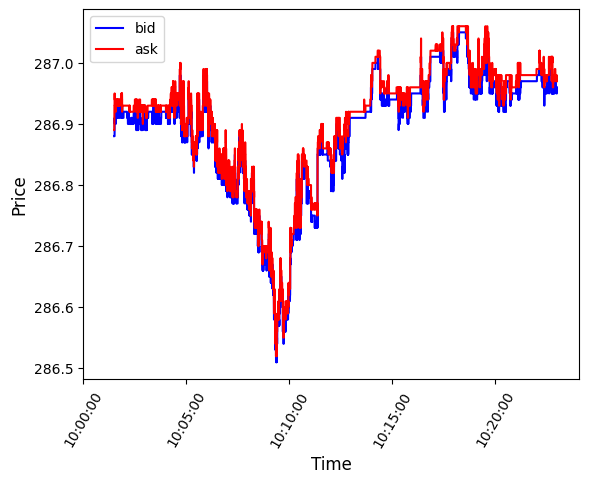

In [8]:
print("len(L1_gen):", len(L1_gen))

# plot L1_gen data
times = [L1_gen[i][0] for i in range(len(L1_gen))]
bids = [L1_gen[i][1][0] for i in range(len(L1_gen))]
asks = [L1_gen[i][2][0] for i in range(len(L1_gen))]
# convert to dollars
bids = [(bid / 100) for bid in bids]
asks = [(ask / 100) for ask in asks]
plt.plot(times, bids, label='bid', color='blue')
plt.plot(times, asks, label='ask', color='red')

# # plot last 10000 time steps
# plt.plot(times[-10000:], bids[-10000:], label='bid')
# plt.plot(times[-10000:], asks[-10000:], label='ask')

plt.legend()
plt.xlabel("Time", fontsize=12)
plt.ylabel("Price", fontsize=12)
# plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
# plt.show()

time_mesh = np.arange(
    # str_to_ns("10:00:00"),
    # str_to_ns("10:31:00"),
    # str_to_ns("12:00:00"),
    # str_to_ns("12:31:00"), 
    # 1e9*60*5 # last number is minutes increment (every 30 minutes in this case)
    *time_mesh_range
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

# # save the plot
# plt.savefig(f'{fig_path}/simulated/bid_ask_{sim_date}.pdf', bbox_inches='tight')

len(last_prices_gen): 3982


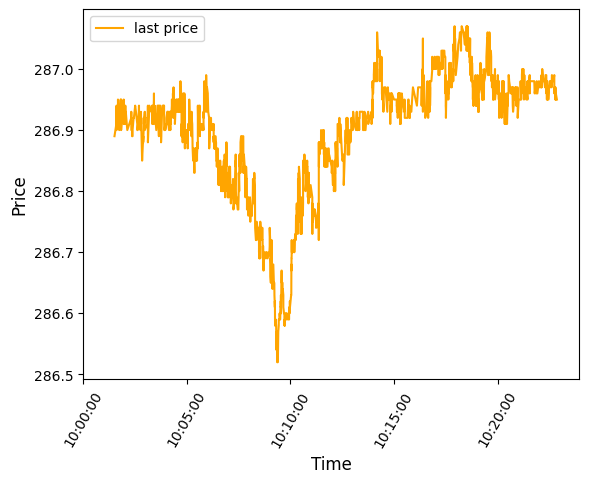

In [9]:
print("len(last_prices_gen):", len(last_prices_gen))

# plot last prices
last_times = [last_prices_gen[i][0] for i in range(len(last_prices_gen))]
prices = [last_prices_gen[i][1] for i in range(len(last_prices_gen))]
# convert to dollars
prices = [(price / 100) for price in prices]
plt.plot(last_times, prices, label='last price', color='orange')

plt.legend()
plt.xlabel("Time", fontsize=12)
plt.ylabel("Price", fontsize=12)
# plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
# plt.show()

time_mesh = np.arange(
    *time_mesh_range
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

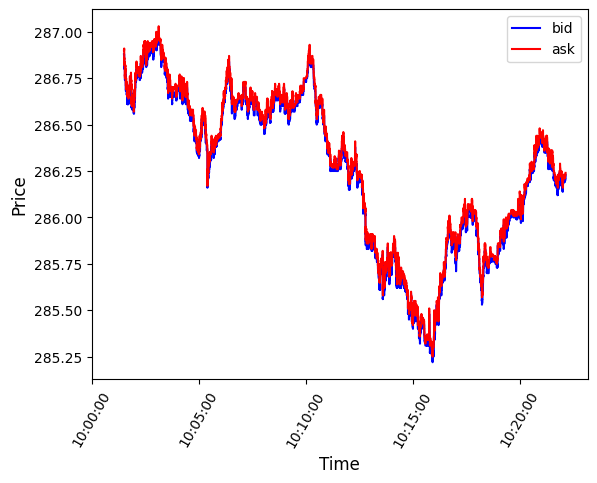

In [10]:
# plot real data

plt.plot(real_book_df_seq['time'].values, real_book_df_seq['1_bid_price'].values, label='bid',
         color='blue')
plt.plot(real_book_df_seq['time'].values, real_book_df_seq['1_ask_price'].values, label='ask',
         color='red')

plt.legend()
plt.xlabel("Time", fontsize=12)
plt.ylabel("Price", fontsize=12)
# plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
# plt.show()

time_mesh = np.arange(
    *time_mesh_range
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

# save the plot
# plt.savefig(f'{fig_path}/empirical/bid_ask_12302019_AAPL.pdf', bbox_inches='tight')
# plt.savefig(f'{fig_path}/empirical/bid_ask_12302019_AAPL_30min.pdf', bbox_inches='tight')

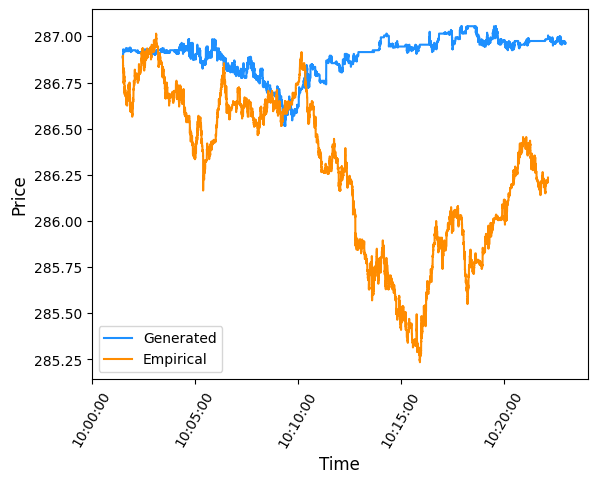

In [11]:
# compute the mid_price of both empirical and simulated data
mid_price_gen = [(ask + bid) / 2 for ask, bid in zip(asks, bids)]
mid_price_real = (real_book_df_seq['1_ask_price'].values + real_book_df_seq['1_bid_price'].values) / 2

# plot the mid-prices of both empirical and simulated data on same plot
plt.plot(times, mid_price_gen, label='Generated', color='dodgerblue')
plt.plot(real_book_df_seq['time'].values, mid_price_real, label='Empirical', color='darkorange')

plt.legend()
plt.xlabel("Time", fontsize=12)
plt.ylabel("Price", fontsize=12)

time_mesh = np.arange(
    *time_mesh_range
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

# save the plot
if save_figs:
    if not os.path.exists(f'{sim_data_path}{sim_date}/figs'):
        os.makedirs(f'{sim_data_path}{sim_date}/figs')
    plt.savefig(f'{sim_data_path}{sim_date}/figs/mid_price_trajectory.pdf', bbox_inches='tight')

# plt.savefig(f'{fig_path}/mid_price_12302019_AAPL.pdf', bbox_inches='tight')


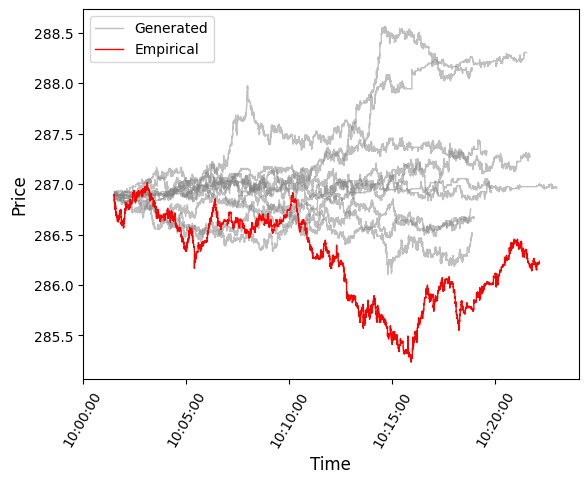

In [12]:
gen_times_dict = {}
mid_price_gen_dict = {}

for sim_date in dates:
    L1_gen = L1_gen_dict[sim_date]
    times = [L1_gen[i][0] for i in range(len(L1_gen))]
    bids = [L1_gen[i][1][0] for i in range(len(L1_gen))]
    asks = [L1_gen[i][2][0] for i in range(len(L1_gen))]
    # convert to dollars
    bids = [(bid / 100) for bid in bids]
    asks = [(ask / 100) for ask in asks]
    mid_price_gen = [(ask + bid) / 2 for ask, bid in zip(asks, bids)]
    gen_times_dict[sim_date] = times[:size_gen_seq]
    mid_price_gen_dict[sim_date] = mid_price_gen[:size_gen_seq]

    # plot the generated mid-price trajectory
    # plt.plot(times[:size_gen_seq], mid_price_gen[:size_gen_seq], label='Generated', color='dodgerblue', lw=1)
    plt.plot(times[:size_gen_seq], mid_price_gen[:size_gen_seq], color='grey', lw=1, alpha=0.5)

# plot the empirical mid-price trajectory
mid_price_real = (real_book_df_seq['1_ask_price'].values + real_book_df_seq['1_bid_price'].values) / 2
# plt.plot(real_book_df_seq['time'].values, mid_price_real, label='Empirical', color='darkorange')
plt.plot(real_book_df_seq['time'].values, mid_price_real, color='red', lw=1)

# create a legend that distinguishes between generated and empirical data
# https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
lines = [Line2D([0], [0], color='grey', linewidth=1, alpha=0.5),
         Line2D([0], [0], color='red', linewidth=1)]
labels = ['Generated', 'Empirical']
plt.legend(lines, labels)
# plt.legend(['Generated', 'Empirical'], loc='upper left')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Price", fontsize=12)

time_mesh = np.arange(
    *time_mesh_range
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

# # plot L1_gen data
# times = [L1_gen[i][0] for i in range(len(L1_gen))]
# bids = [L1_gen[i][1][0] for i in range(len(L1_gen))]
# asks = [L1_gen[i][2][0] for i in range(len(L1_gen))]
# # convert to dollars
# bids = [(bid / 100) for bid in bids]
# asks = [(ask / 100) for ask in asks]


# gen_data_dict = {}
# L1_gen_dict = {}
# last_prices_dict = {}

if save_gpt_fig:
    plt.savefig(f'{fig_path}/mid_price_trajectory_12302019_AAPL.pdf', bbox_inches='tight')


In [13]:
# plot last prices
last_times = [last_prices_gen[i][0] for i in range(len(last_prices_gen))]
prices = [last_prices_gen[i][1] for i in range(len(last_prices_gen))]
# convert to dollars
prices = [(price / 100) for price in prices]

Size of executed generated sequence: 4116


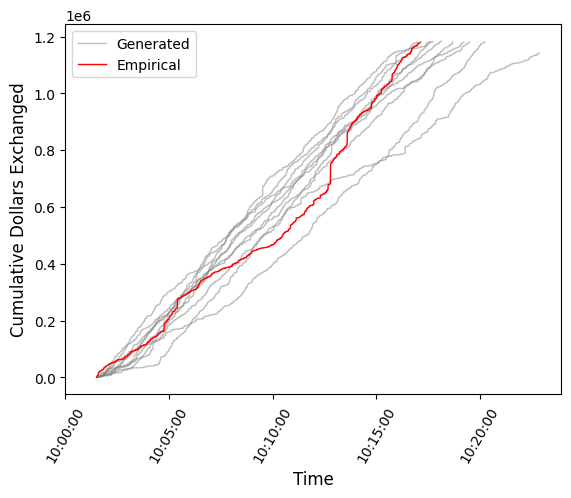

In [14]:
last_prices_sizes = []

for sim_date in dates:
    last_prices_sizes.append(len(last_prices_dict[sim_date]))

size_exec_gen_seq = sorted(last_prices_sizes)[1] # min(last_prices_sizes)
print('Size of executed generated sequence:', size_exec_gen_seq)

# last_times_dict = {}
# # last_prices_gen_dict = {}
# notional_val_gen_cumsum_dict = {}
last_times_list = []
notional_val_gen_cumsum_list = []
num_gen_msgs = []

for sim_date in dates:
    last_prices_gen = last_prices_dict[sim_date]
    last_times = [last_prices_gen[i][0] for i in range(len(last_prices_gen))]
    prices = [last_prices_gen[i][1] for i in range(len(last_prices_gen))]
    # convert to dollars
    prices = [(price / 100) for price in prices]
    # last_times_dict[sim_date] = last_times[:size_gen_seq]
    last_times_list = last_times_list + last_times[:size_exec_gen_seq]
    # last_prices_gen_dict[sim_date] = prices[:size_gen_seq]
    # notional_val_gen_cumsum_dict[sim_date] = np.cumsum(prices[:size_gen_seq])
    notional_val_gen_cumsum_list = notional_val_gen_cumsum_list + np.cumsum(prices[:size_exec_gen_seq]).tolist()
    num_gen_msgs = num_gen_msgs + [i for i in range(len(prices[:size_exec_gen_seq]))]

    # plot the generated cumulative sum of notional value of money exchanged
    plt.plot(last_times[:size_exec_gen_seq], np.cumsum(prices[:size_exec_gen_seq]), color='grey', lw=1, alpha=0.5)

# plot the empirical cumulative sum of notional value of money exchanged
exec_order_real = real_msg_df_seq[real_msg_df_seq['event_type'] == 2][:size_exec_gen_seq] # readjust slicing to match the size of the generated data
real_prices = exec_order_real['price_abs'].values
real_prices = [(real_price / 100) for real_price in real_prices] # convert to dollars
notional_val_real_cumsum = np.cumsum(real_prices)
exec_order_real_times = exec_order_real['time_s']*1000000000 + exec_order_real['time_ns']
plt.plot(exec_order_real_times, notional_val_real_cumsum, color='red', lw=1)

# create a legend that distinguishes between generated and empirical data
# https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
lines = [Line2D([0], [0], color='grey', linewidth=1, alpha=0.5),
         Line2D([0], [0], color='red', linewidth=1)]
labels = ['Generated', 'Empirical']
plt.legend(lines, labels)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Cumulative Dollars Exchanged", fontsize=12)

time_mesh = np.arange(
    *time_mesh_range
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

if save_gpt_fig:
    plt.savefig(f'{fig_path}/cumulative_dollars_exchanged_12302019_AAPL.pdf', bbox_inches='tight')

Notional value off by a factor of: 1.13


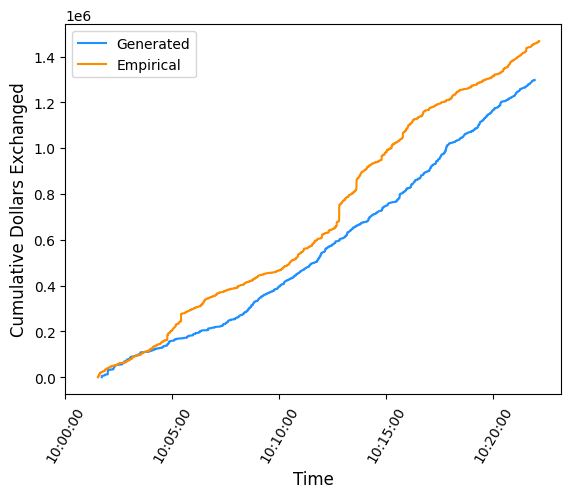

In [15]:
# plot the cumulative sum of notional value of money exchanged
notional_val_gen_cumsum = np.cumsum(prices)
exec_order_real = real_msg_df_seq[real_msg_df_seq['event_type'] == 2]
real_prices = exec_order_real['price_abs'].values
real_prices = [(real_price / 100) for real_price in real_prices] # convert to dollars
notional_val_real_cumsum = np.cumsum(real_prices)
exec_order_real_times = exec_order_real['time_s']*1000000000 + exec_order_real['time_ns']

# notional value is off by a factor of
print("Notional value off by a factor of:", round(notional_val_real_cumsum[-1] / notional_val_gen_cumsum[-1], 3))

plt.plot(last_times, notional_val_gen_cumsum, label='Generated', color='dodgerblue')
plt.plot(exec_order_real_times, notional_val_real_cumsum, label='Empirical', color='darkorange')

plt.legend()
plt.xlabel("Time", fontsize=12)
plt.ylabel("Cumulative Dollars Exchanged", fontsize=12)

time_mesh = np.arange(
    *time_mesh_range
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/cumulative_dollars_exchanged.pdf', bbox_inches='tight')


## Volume Series

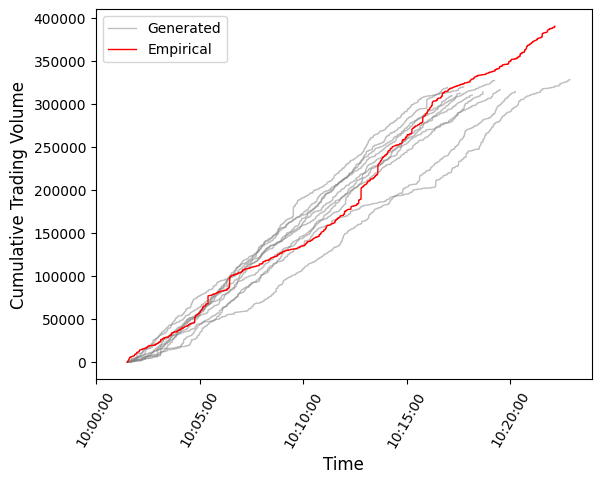

In [16]:
for sim_date in dates:
    gen_data_df = gen_data_dict[sim_date]
    exec_order_gen = gen_data_df[gen_data_df['event_type'] == 2]
    exec_order_gen_times = exec_order_gen['time_s']*1000000000 + exec_order_gen['time_ns']
    trading_vol_gen = exec_order_gen['fill_size'].cumsum()

    # plot the generated cumulative trading volume
    plt.plot(exec_order_gen_times[:size_exec_gen_seq], trading_vol_gen[:size_exec_gen_seq], color='grey', lw=1, alpha=0.5)

# plot the empirical cumulative trading volume
trading_vol_real = exec_order_real['fill_size'].cumsum()
plt.plot(exec_order_real_times, trading_vol_real, color='red', lw=1)

# create a legend that distinguishes between generated and empirical data
# https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
lines = [Line2D([0], [0], color='grey', linewidth=1, alpha=0.5),
         Line2D([0], [0], color='red', linewidth=1)]
labels = ['Generated', 'Empirical']
plt.legend(lines, labels)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Cumulative Trading Volume", fontsize=12)

time_mesh = np.arange(
    *time_mesh_range
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

if save_gpt_fig:
    plt.savefig(f'{fig_path}/cumulative_trading_volume_12302019_AAPL.pdf', bbox_inches='tight')


Trading volume off by a factor of: 1.138


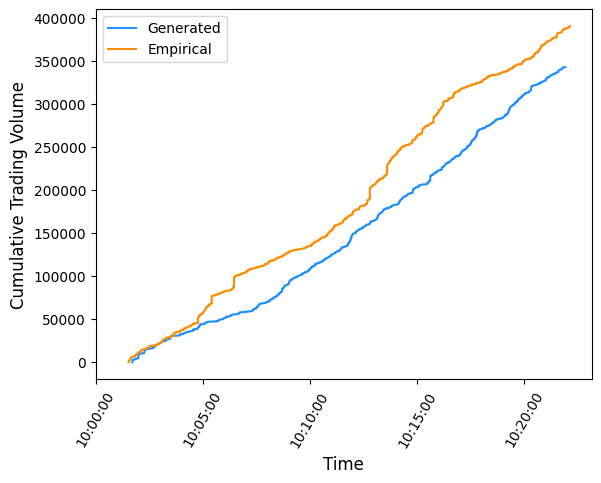

In [17]:
# plot the cumulative trading volume over time
exec_order_gen = gen_data_df[gen_data_df['event_type'] == 2]
exec_order_gen_times = exec_order_gen['time_s']*1000000000 + exec_order_gen['time_ns']
# exec_order_real = real_msg_df_seq[real_msg_df_seq['event_type'] == 2]
# exec_order_real_times = exec_order_real['time_s']*1000000000 + exec_order_real['time_ns']

trading_vol_gen = exec_order_gen['fill_size'].cumsum()
trading_vol_real = exec_order_real['fill_size'].cumsum()

# trading volume off by a factor of
print("Trading volume off by a factor of:", round(trading_vol_real.values[-1] / trading_vol_gen.values[-1], 3))

plt.plot(exec_order_gen_times, trading_vol_gen, label='Generated', color='dodgerblue')
plt.plot(exec_order_real_times, trading_vol_real, label='Empirical', color='darkorange')

plt.legend()
plt.xlabel("Time", fontsize=12)
plt.ylabel("Cumulative Trading Volume", fontsize=12)

time_mesh = np.arange(
    *time_mesh_range
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/cumulative_trading_volume.pdf', bbox_inches='tight')

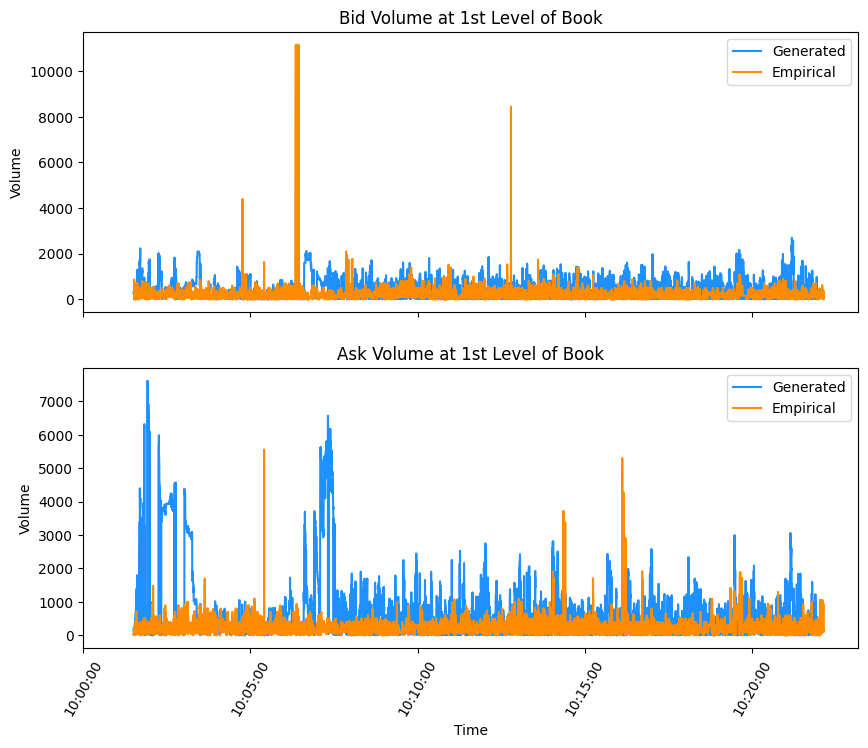

In [18]:
# plot the volume at 1st level of the book for both generated and empirical data
# plt.plot(times, [L1_gen[i][1][1] for i in range(len(L1_gen))], label='bid', color='blue')
L1_gen_bid_vol = [L1_gen[i][1][1] for i in range(len(L1_gen))]
L1_gen_ask_vol = [L1_gen[i][2][1] for i in range(len(L1_gen))]

L1_real_bid_vol = real_book_df_seq['1_bid_vol'].values
L1_real_ask_vol = real_book_df_seq['1_ask_vol'].values

# create two subplots, one for bids and one for asks
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(times, L1_gen_bid_vol, label='Generated', color='dodgerblue')
axs[0].plot(real_book_df_seq['time'].values, L1_real_bid_vol, label='Empirical', color='darkorange')
axs[0].set_title('Bid Volume at 1st Level of Book')
axs[0].legend()

plt.setp(axs[0].get_xticklabels(), visible=True)


axs[1].plot(times, L1_gen_ask_vol, label='Generated', color='dodgerblue')
axs[1].plot(real_book_df_seq['time'].values, L1_real_ask_vol, label='Empirical', color='darkorange')
axs[1].set_title('Ask Volume at 1st Level of Book')
axs[1].legend()


# share x and y axis labels and make them visible on both subplots
for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Volume')
    ax.label_outer()

    # set x-axis ticks
    time_mesh = np.arange(
        *time_mesh_range
    )
    ax.set_xticks(time_mesh)
    ax.set_xticklabels([ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60)


# for ax in axs.flat:
#     ax.set(xlabel='Time', ylabel='Volume')
#     ax.label_outer()

#     # set x-axis ticks
#     time_mesh = np.arange(
#         str_to_ns("10:00:00"),
#         str_to_ns("10:31:00"),
#         1e9*60*5 # last number is minutes increment (every 30 minutes in this case)
#     )
#     ax.set_xticks(time_mesh)
#     ax.set_xticklabels([ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60)



# plt.xlabel("Time", fontsize=12)
# plt.ylabel("Volume", fontsize=12)

# time_mesh = np.arange(
#     str_to_ns("10:00:00"),
#     str_to_ns("10:31:00"),
#     1e9*60*5 # last number is minutes increment (every 30 minutes in this case)
# )
# _=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/volume_1st_level.pdf', bbox_inches='tight')

## Order Type Distribution

Total number of messages: 137617
Add Order percentage: 50.07 % (count: 68911 )
Execute Order percentage: 3.29 % (count: 4523 )
Cancel Order percentage: 43.21 % (count: 59471 )
Replace Order percentage: 3.42 % (count: 4712 )


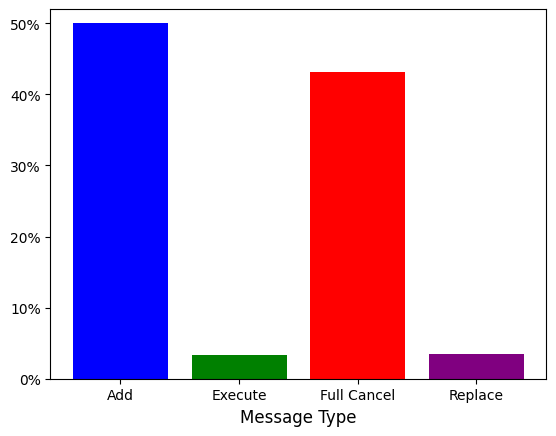

In [19]:
# size_gen_seq = len(gen_data_df)
num_add_order_msgs_gen = gen_data_df[gen_data_df['event_type'] == 1].shape[0]
num_exec_order_msgs_gen = gen_data_df[gen_data_df['event_type'] == 2].shape[0]
# num_execmod_order_msgs_gen = gen_data_df[gen_data_df['event_type'] == 3].shape[0]
num_cancel_order_msgs_gen = gen_data_df[gen_data_df['event_type'] == 4].shape[0]
num_replace_order_msgs_gen = gen_data_df[gen_data_df['event_type'] == 5].shape[0]
# total_msgs_gen = num_add_order_msgs_gen + num_exec_order_msgs_gen + num_execmod_order_msgs_gen + num_cancel_order_msgs_gen + num_replace_order_msgs_gen
total_msgs_gen = num_add_order_msgs_gen + num_exec_order_msgs_gen + num_cancel_order_msgs_gen + num_replace_order_msgs_gen

add_percent_gen = (num_add_order_msgs_gen / total_msgs_gen)
exec_percent_gen = (num_exec_order_msgs_gen / total_msgs_gen)
# execmod_percent_gen = (num_execmod_order_msgs_gen / total_msgs_gen)
cancel_percent_gen = (num_cancel_order_msgs_gen / total_msgs_gen)
replace_percent_gen = (num_replace_order_msgs_gen / total_msgs_gen)

print("Total number of messages:", total_msgs_gen)
print("Add Order percentage:", round((num_add_order_msgs_gen / total_msgs_gen) * 100, 2), "%", "(count:", num_add_order_msgs_gen, ")")
print("Execute Order percentage:", round((num_exec_order_msgs_gen / total_msgs_gen) * 100, 2), "%", "(count:", num_exec_order_msgs_gen, ")")
# print("Modified Execute Order percentage:", round((num_execmod_order_msgs_gen / total_msgs_gen) * 100, 2), "%", "(count:", num_execmod_order_msgs_gen, ")")
print("Cancel Order percentage:", round((num_cancel_order_msgs_gen / total_msgs_gen) * 100, 2), "%", "(count:", num_cancel_order_msgs_gen, ")")
print("Replace Order percentage:", round((num_replace_order_msgs_gen / total_msgs_gen) * 100, 2), "%", "(count:", num_replace_order_msgs_gen, ")")

# # plot message type counts
# msg_types = ['Add', 'Execute', 'M-Execute', 'Full Cancel', 'Replace']
# msg_counts = [num_add_order_msgs_gen, num_exec_order_msgs_gen, num_execmod_order_msgs_gen, num_cancel_order_msgs_gen, num_replace_order_msgs_gen]
# plt.bar(msg_types, msg_counts, color=['blue', 'green', 'orange', 'red', 'purple'])
# plt.xlabel("Message Type", fontsize=12)
# plt.ylabel("Count", fontsize=12)
# plt.show()

# plot message type percentages
# msg_types = ['Add', 'Execute', 'M-Execute', 'Full Cancel', 'Replace']
msg_types = ['Add', 'Execute', 'Full Cancel', 'Replace']
# msg_percents = [add_percent_gen, exec_percent_gen, execmod_percent_gen, cancel_percent_gen, replace_percent_gen]
msg_percents = [add_percent_gen, exec_percent_gen, cancel_percent_gen, replace_percent_gen]
# plt.bar(msg_types, msg_percents, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.bar(msg_types, msg_percents, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Message Type", fontsize=12)
# plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
plt.ylim(0, 0.52)
plt.gca().yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))

# # save the plot
# plt.savefig(f'{fig_path}/simulated/msg_type_{sim_date}.pdf', bbox_inches='tight')

Total number of messages: 135782
Add Order percentage: 46.12 % (count: 62628 )
Execute Order percentage: 3.78 % (count: 5127 )
Cancel Order percentage: 43.64 % (count: 59254 )
Replace Order percentage: 6.46 % (count: 8773 )


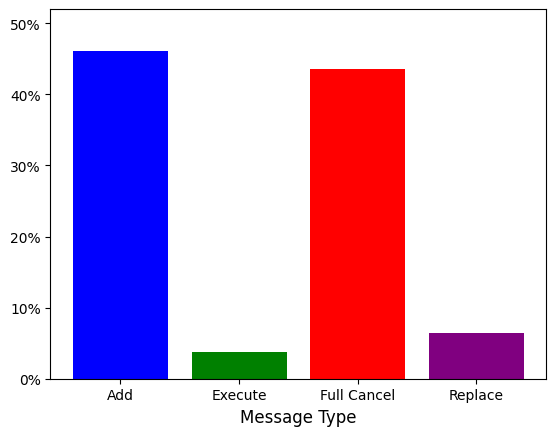

In [20]:
num_add_order_msgs_real = real_msg_df_seq[real_msg_df_seq['event_type'] == 1].shape[0]
num_exec_order_msgs_real = real_msg_df_seq[real_msg_df_seq['event_type'] == 2].shape[0]
# num_execmod_order_msgs_real = real_msg_df_seq[real_msg_df_seq['event_type'] == 3].shape[0]
num_cancel_order_msgs_real = real_msg_df_seq[real_msg_df_seq['event_type'] == 4].shape[0]
num_replace_order_msgs_real = real_msg_df_seq[real_msg_df_seq['event_type'] == 5].shape[0]
# total_msgs_real = num_add_order_msgs_real + num_exec_order_msgs_real + num_execmod_order_msgs_real + num_cancel_order_msgs_real + num_replace_order_msgs_real
total_msgs_real = num_add_order_msgs_real + num_exec_order_msgs_real + num_cancel_order_msgs_real + num_replace_order_msgs_real

add_percent_real = (num_add_order_msgs_real / total_msgs_real)
exec_percent_real = (num_exec_order_msgs_real / total_msgs_real)
# execmod_percent_real = (num_execmod_order_msgs_real / total_msgs_real)
cancel_percent_real = (num_cancel_order_msgs_real / total_msgs_real)
replace_percent_real = (num_replace_order_msgs_real / total_msgs_real)

print("Total number of messages:", total_msgs_real)
print("Add Order percentage:", round((num_add_order_msgs_real / total_msgs_real) * 100, 2), "%", "(count:", num_add_order_msgs_real, ")")
print("Execute Order percentage:", round((num_exec_order_msgs_real / total_msgs_real) * 100, 2), "%", "(count:", num_exec_order_msgs_real, ")")
# print("Modified Execute Order percentage:", round((num_execmod_order_msgs_real / total_msgs_real) * 100, 2), "%", "(count:", num_execmod_order_msgs_real, ")")
print("Cancel Order percentage:", round((num_cancel_order_msgs_real / total_msgs_real) * 100, 2), "%", "(count:", num_cancel_order_msgs_real, ")")
print("Replace Order percentage:", round((num_replace_order_msgs_real / total_msgs_real) * 100, 2), "%", "(count:", num_replace_order_msgs_real, ")")

# # plot message type counts
# msg_types = ['Add', 'Execute', 'M-Execute', 'Full Cancel', 'Replace']
# msg_counts = [num_add_order_msgs_real, num_exec_order_msgs_real, num_execmod_order_msgs_real, num_cancel_order_msgs_real, num_replace_order_msgs_real]
# plt.bar(msg_types, msg_counts)
# plt.xlabel("Message Type")
# plt.ylabel("Count")
# plt.show()

# plot message type percentages
# msg_types = ['Add', 'Execute', 'M-Execute', 'Full Cancel', 'Replace']
msg_types = ['Add', 'Execute', 'Full Cancel', 'Replace']
# msg_percents = [add_percent_real, exec_percent_real, execmod_percent_real, cancel_percent_real, replace_percent_real]
real_msg_percents = [add_percent_real, exec_percent_real, cancel_percent_real, replace_percent_real]
# plt.bar(msg_types, msg_percents, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.bar(msg_types, real_msg_percents, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Message Type", fontsize=12)
# plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
plt.ylim(0, 0.52)
plt.gca().yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
# plt.show()

# # save the plot
# plt.savefig(f'{fig_path}/empirical/msg_type_12302019_AAPL.pdf', bbox_inches='tight')

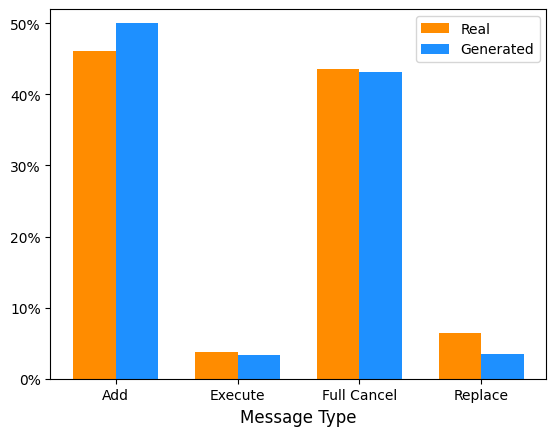

In [21]:
# plot a grouped plot of the message type percentages (real vs. generated)
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(msg_types))
bar1 = ax.bar(index, real_msg_percents, bar_width, label='Real', color='darkorange')
bar2 = ax.bar(index + bar_width, msg_percents, bar_width, label='Generated', color='dodgerblue')
ax.set_xlabel('Message Type', fontsize=12)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(msg_types)
ax.legend()
# plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
plt.ylim(0, 0.52)
plt.gca().yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))

# # save the plot
# plt.savefig(f'{fig_path}/empirical/msg_type_12302019_AAPL_grouped.pdf', bbox_inches='tight')

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/msg_type_percentages.pdf', bbox_inches='tight')

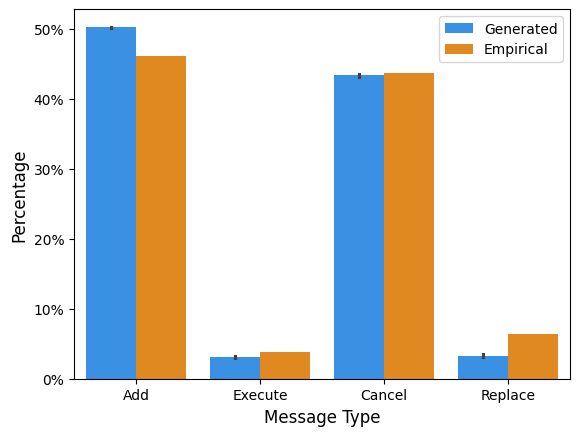

In [22]:
# plot the message type percentages for both generated (all of it) and empirical data
add_percent_list = []
exec_percent_list = []
cancel_percent_list = []
replace_percent_list = []

for sim_date in dates:
    gen_data_df = gen_data_dict[sim_date][:size_gen_seq]
    num_add_order_msgs_gen = gen_data_df[gen_data_df['event_type'] == 1].shape[0]
    num_exec_order_msgs_gen = gen_data_df[gen_data_df['event_type'] == 2].shape[0]
    num_cancel_order_msgs_gen = gen_data_df[gen_data_df['event_type'] == 4].shape[0]
    num_replace_order_msgs_gen = gen_data_df[gen_data_df['event_type'] == 5].shape[0]
    total_msgs_gen = num_add_order_msgs_gen + num_exec_order_msgs_gen + num_cancel_order_msgs_gen + num_replace_order_msgs_gen

    add_percent_gen = (num_add_order_msgs_gen / total_msgs_gen)
    exec_percent_gen = (num_exec_order_msgs_gen / total_msgs_gen)
    cancel_percent_gen = (num_cancel_order_msgs_gen / total_msgs_gen)
    replace_percent_gen = (num_replace_order_msgs_gen / total_msgs_gen)
    add_percent_list.append(add_percent_gen)
    exec_percent_list.append(exec_percent_gen)
    cancel_percent_list.append(cancel_percent_gen)
    replace_percent_list.append(replace_percent_gen)


percent_type_gen_df = pd.DataFrame({
    'Event_Type': ['Add'] * len(add_percent_list) + ['Execute'] * len(exec_percent_list) + ['Cancel'] * len(cancel_percent_list) + ['Replace'] * len(replace_percent_list),
    'Percentage': add_percent_list + exec_percent_list + cancel_percent_list + replace_percent_list,
    'Data_Type': ['Generated'] * len(add_percent_list) + ['Generated'] * len(exec_percent_list) + ['Generated'] * len(cancel_percent_list) + ['Generated'] * len(replace_percent_list)
})

percent_type_real_df = pd.DataFrame({
    'Event_Type': ['Add', 'Execute', 'Cancel', 'Replace'],
    'Percentage': [add_percent_real, exec_percent_real, cancel_percent_real, replace_percent_real],
    'Data_Type': ['Empirical'] * 4
})

# merge the two dataframes
percent_type_df = pd.concat([percent_type_gen_df, percent_type_real_df], axis=0)

fig, ax = plt.subplots()
# colors = ['dodgerblue', 'darkorange', 'dodgerblue', 'darkorange', 'dodgerblue', 'darkorange', 'dodgerblue', 'darkorange']
colors = ['dodgerblue', 'darkorange']
sns.barplot(x='Event_Type', y='Percentage', hue='Data_Type', data=percent_type_df, ax=ax, palette=colors)

# set axis labels
ax.set_xlabel("Message Type", fontsize=12)
# ax.set_ylabel("", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)

plt.legend()
plt.gca().yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))

# save the plot
if save_gpt_fig:
    plt.savefig(f'{fig_path}/msg_type_percentage_12302019_AAPL.pdf', bbox_inches='tight')

# plt.savefig(f'{fig_path}/msg_type_percentage_12302019_AAPL_edit.pdf', bbox_inches='tight')

## Order Flow Distributions

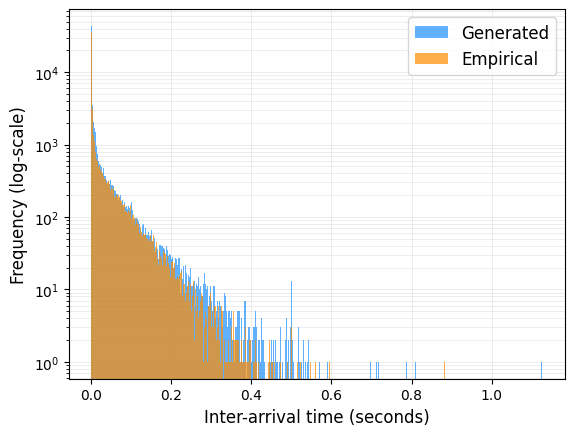

In [23]:
# compute and plot the distribution of limit order inter-arrival rates -
add_order_gen = gen_data_df[gen_data_df['event_type'] == 1]
add_order_gen_times = add_order_gen['time_s']*1000000000 + add_order_gen['time_ns']
add_order_gen_inter_times = np.diff(add_order_gen_times)
add_order_gen_inter_times = add_order_gen_inter_times / 1e9 # convert to seconds

# repeat for real data
add_order_real = real_msg_df_seq[real_msg_df_seq['event_type'] == 1]
add_order_real_times = add_order_real['time_s']*1000000000 + add_order_real['time_ns']
add_order_real_inter_times = np.diff(add_order_real_times)
add_order_real_inter_times = add_order_real_inter_times / 1e9 # convert to seconds

plt.hist(add_order_gen_inter_times, color='dodgerblue', bins=500, alpha=0.7)
plt.hist(add_order_real_inter_times, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
# plt.xlim(-0.04, 0.93)
plt.legend(['Generated', 'Empirical'], fontsize=12)
plt.xlabel("Inter-arrival time (seconds)", fontsize=12)
plt.ylabel("Frequency (log-scale)", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# # save the plot
# plt.savefig(f'{fig_path}/simulated/limit_order_inter_arrival_{sim_date}.pdf', bbox_inches='tight')

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/limit_order_inter_arrival.pdf', bbox_inches='tight')

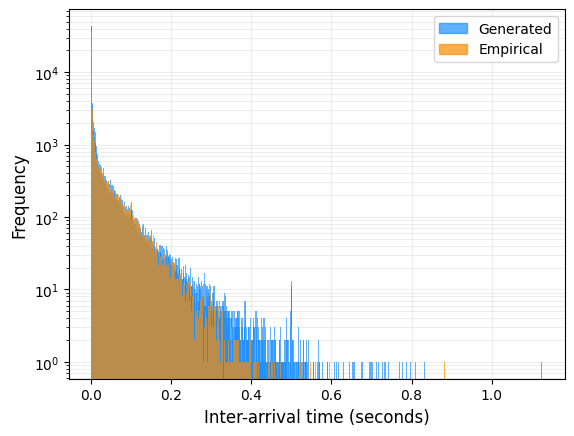

In [24]:
# compute and plot the distribution of limit order inter-arrival rates -
for sim_date in dates:
    gen_data_df = gen_data_dict[sim_date][:size_gen_seq]
    add_order_gen = gen_data_df[gen_data_df['event_type'] == 1]
    add_order_gen_times = add_order_gen['time_s']*1000000000 + add_order_gen['time_ns']
    add_order_gen_inter_times = np.diff(add_order_gen_times)
    add_order_gen_inter_times = add_order_gen_inter_times / 1e9 # convert to seconds
    plt.hist(add_order_gen_inter_times, color='dodgerblue', bins=500, alpha=0.7)
    
plt.hist(add_order_real_inter_times, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
# plt.legend(['Generated', 'Empirical'], fontsize=12)
# create a legend that distinguishes between generated and empirical data
# https://stackoverflow.com/questions/43872450/matplotlib-histogram-with-multiple-legend-entries
from matplotlib.patches import Rectangle
plt.legend(handles=[Rectangle((0,0),1,1,color='dodgerblue', alpha=0.7),
                    Rectangle((0,0),1,1,color='darkorange', alpha=0.7)],
                    labels=['Generated', 'Empirical'])
plt.xlabel("Inter-arrival time (seconds)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# save the plot
if save_gpt_fig:
    plt.savefig(f'{fig_path}/limit_order_inter_arrival_12302019_AAPL.pdf', bbox_inches='tight')

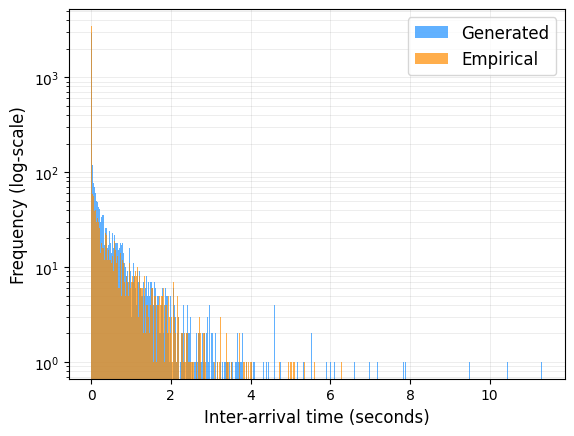

In [25]:
# compute and plot the distribution of execute order inter-arrival rates -
exec_order_gen = gen_data_df[gen_data_df['event_type'] == 2]
exec_order_gen_times = exec_order_gen['time_s']*1000000000 + exec_order_gen['time_ns']
exec_order_gen_inter_times = np.diff(exec_order_gen_times)
exec_order_gen_inter_times = exec_order_gen_inter_times / 1e9 # convert to seconds

# repeat for real data
exec_order_real = real_msg_df_seq[real_msg_df_seq['event_type'] == 2]
exec_order_real_times = exec_order_real['time_s']*1000000000 + exec_order_real['time_ns']
exec_order_real_inter_times = np.diff(exec_order_real_times)
exec_order_real_inter_times = exec_order_real_inter_times / 1e9 # convert to seconds

plt.hist(exec_order_gen_inter_times, color='dodgerblue', bins=500, alpha=0.7)
plt.hist(exec_order_real_inter_times, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
# plt.xlim(-0.4, 9.9)
plt.legend(['Generated', 'Empirical'], fontsize=12)
plt.xlabel("Inter-arrival time (seconds)", fontsize=12)
plt.ylabel("Frequency (log-scale)", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# # save the plot
# plt.savefig(f'{fig_path}/simulated/exec_order_inter_arrival_{sim_date}.pdf', bbox_inches='tight')

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/exec_order_inter_arrival.pdf', bbox_inches='tight')

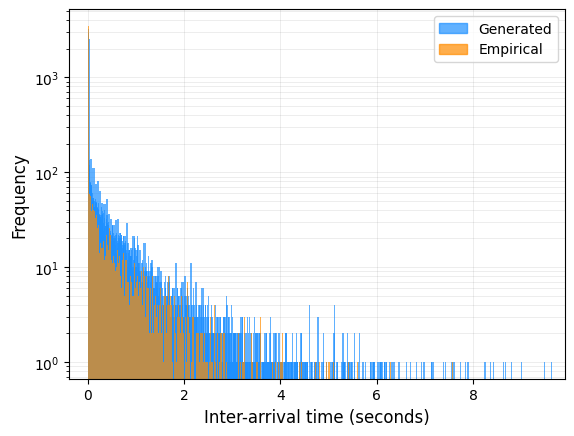

In [26]:
# compute and plot the distribution of execute order inter-arrival rates -
for sim_date in dates:
    gen_data_df = gen_data_dict[sim_date][:size_gen_seq]
    exec_order_gen = gen_data_df[gen_data_df['event_type'] == 2]
    # ===== Adjust Data Before Bug Fix: remove row in cancel_order_gen with fill_size=0
    exec_order_gen = exec_order_gen[exec_order_gen['fill_size'] > 0]
    # =====
    exec_order_gen_times = exec_order_gen['time_s']*1000000000 + exec_order_gen['time_ns']
    exec_order_gen_inter_times = np.diff(exec_order_gen_times)
    exec_order_gen_inter_times = exec_order_gen_inter_times / 1e9 # convert to seconds
    plt.hist(exec_order_gen_inter_times, color='dodgerblue', bins=500, alpha=0.7)

plt.hist(exec_order_real_inter_times, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
plt.xlim(-0.4, 9.9) # dont forget to mention this in the caption
# create a legend that distinguishes between generated and empirical data
plt.legend(handles=[Rectangle((0,0),1,1,color='dodgerblue', alpha=0.7),
                    Rectangle((0,0),1,1,color='darkorange', alpha=0.7)],
                    labels=['Generated', 'Empirical'])
plt.xlabel("Inter-arrival time (seconds)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# save the plot
if save_gpt_fig:
    plt.savefig(f'{fig_path}/exec_order_inter_arrival_12302019_AAPL.pdf', bbox_inches='tight')

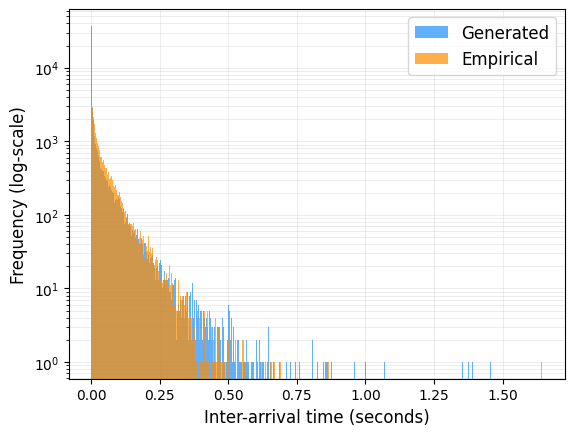

In [27]:
# compute and plot the distribution of cancel order inter-arrival rates -
cancel_order_gen = gen_data_df[gen_data_df['event_type'] == 4]
# ===== Adjust Data Before Bug Fix: remove row in cancel_order_gen with fill_size=0
cancel_order_gen = cancel_order_gen[cancel_order_gen['fill_size'] > 0]
# =====
cancel_order_gen_times = cancel_order_gen['time_s']*1000000000 + cancel_order_gen['time_ns']
cancel_order_gen_inter_times = np.diff(cancel_order_gen_times)
cancel_order_gen_inter_times = cancel_order_gen_inter_times / 1e9 # convert to seconds

# repeat for real data
cancel_order_real = real_msg_df_seq[real_msg_df_seq['event_type'] == 4]
cancel_order_real_times = cancel_order_real['time_s']*1000000000 + cancel_order_real['time_ns']
cancel_order_real_inter_times = np.diff(cancel_order_real_times)
cancel_order_real_inter_times = cancel_order_real_inter_times / 1e9 # convert to seconds

plt.hist(cancel_order_gen_inter_times, color='dodgerblue', bins=500, alpha=0.7)
plt.hist(cancel_order_real_inter_times, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
# plt.xlim(-0.08, 1.74)
plt.legend(['Generated', 'Empirical'], fontsize=12)
plt.xlabel("Inter-arrival time (seconds)", fontsize=12)
plt.ylabel("Frequency (log-scale)", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# # save the plot
# plt.savefig(f'{fig_path}/simulated/cancel_order_inter_arrival_{sim_date}.pdf', bbox_inches='tight')

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/cancel_order_inter_arrival.pdf', bbox_inches='tight')

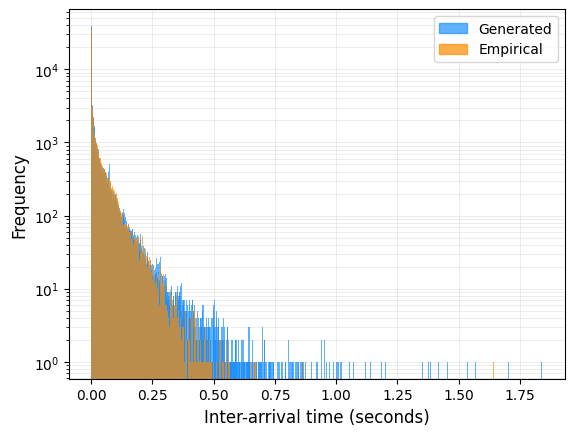

In [28]:
# compute and plot the distribution of cancel order inter-arrival rates -
for sim_date in dates:
    gen_data_df = gen_data_dict[sim_date][:size_gen_seq]
    cancel_order_gen = gen_data_df[gen_data_df['event_type'] == 4]
    # ===== Adjust Data Before Bug Fix: remove row in cancel_order_gen with fill_size=0
    cancel_order_gen = cancel_order_gen[cancel_order_gen['fill_size'] > 0]
    # =====
    cancel_order_gen_times = cancel_order_gen['time_s']*1000000000 + cancel_order_gen['time_ns']
    cancel_order_gen_inter_times = np.diff(cancel_order_gen_times)
    cancel_order_gen_inter_times = cancel_order_gen_inter_times / 1e9 # convert to seconds
    plt.hist(cancel_order_gen_inter_times, color='dodgerblue', bins=500, alpha=0.7)

plt.hist(cancel_order_real_inter_times, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
# create a legend that distinguishes between generated and empirical data
plt.legend(handles=[Rectangle((0,0),1,1,color='dodgerblue', alpha=0.7),
                    Rectangle((0,0),1,1,color='darkorange', alpha=0.7)],
                    labels=['Generated', 'Empirical'])
plt.xlabel("Inter-arrival time (seconds)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# save the plot
if save_gpt_fig:
    plt.savefig(f'{fig_path}/cancel_order_inter_arrival_12302019_AAPL.pdf', bbox_inches='tight')


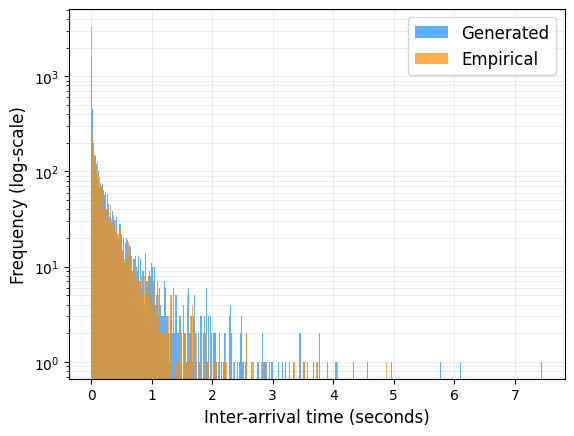

In [29]:
# compute and plot the distribution of replace order inter-arrival rates -
replace_order_gen = gen_data_df[gen_data_df['event_type'] == 5]
replace_order_gen_times = replace_order_gen['time_s']*1000000000 + replace_order_gen['time_ns']
replace_order_gen_inter_times = np.diff(replace_order_gen_times)
replace_order_gen_inter_times = replace_order_gen_inter_times / 1e9 # convert to seconds

# repeat for real data
replace_order_real = real_msg_df_seq[real_msg_df_seq['event_type'] == 5]
replace_order_real_times = replace_order_real['time_s']*1000000000 + replace_order_real['time_ns']
replace_order_real_inter_times = np.diff(replace_order_real_times)
replace_order_real_inter_times = replace_order_real_inter_times / 1e9 # convert to seconds

plt.hist(replace_order_gen_inter_times, color='dodgerblue', bins=500, alpha=0.7)
plt.hist(replace_order_real_inter_times, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
# plt.xlim(-0.08, 1.74)
plt.legend(['Generated', 'Empirical'], fontsize=12)
plt.xlabel("Inter-arrival time (seconds)", fontsize=12)
plt.ylabel("Frequency (log-scale)", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# # save the plot
# plt.savefig(f'{fig_path}/simulated/replace_order_inter_arrival_{sim_date}.pdf', bbox_inches='tight')

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/replace_order_inter_arrival.pdf', bbox_inches='tight')

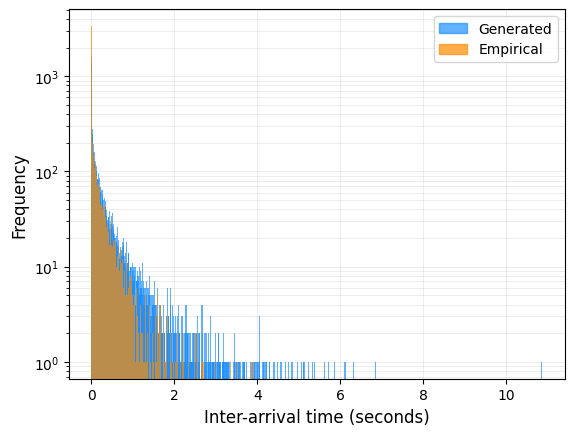

In [30]:
# compute and plot the distribution of replace order inter-arrival rates -
for sim_date in dates:
    gen_data_df = gen_data_dict[sim_date][:size_gen_seq]
    replace_order_gen = gen_data_df[gen_data_df['event_type'] == 5]
    replace_order_gen_times = replace_order_gen['time_s']*1000000000 + replace_order_gen['time_ns']
    replace_order_gen_inter_times = np.diff(replace_order_gen_times)
    replace_order_gen_inter_times = replace_order_gen_inter_times / 1e9 # convert to seconds
    plt.hist(replace_order_gen_inter_times, color='dodgerblue', bins=500, alpha=0.7)

plt.hist(replace_order_real_inter_times, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
# create a legend that distinguishes between generated and empirical data
plt.legend(handles=[Rectangle((0,0),1,1,color='dodgerblue', alpha=0.7),
                    Rectangle((0,0),1,1,color='darkorange', alpha=0.7)],
                    labels=['Generated', 'Empirical'])
plt.xlabel("Inter-arrival time (seconds)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# save the plot
if save_gpt_fig:
    plt.savefig(f'{fig_path}/replace_order_inter_arrival_12302019_AAPL.pdf', bbox_inches='tight')

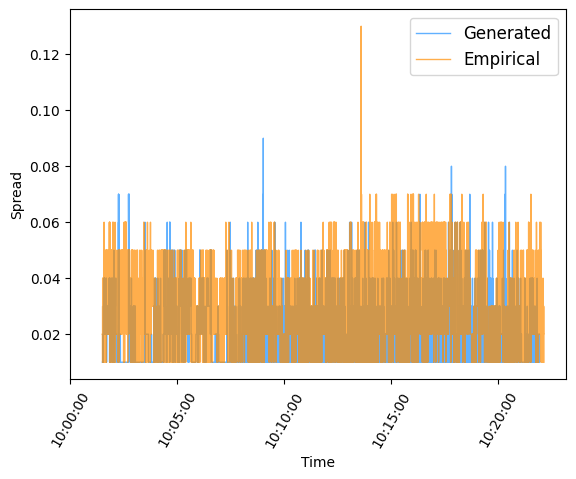

In [31]:
# plot the spread of the generated data
spread_gen = [ask - bid for ask, bid in zip(asks, bids)]
spread_real = real_book_df_seq['1_ask_price'].values - real_book_df_seq['1_bid_price'].values

plt.plot(times, spread_gen, lw=1, color='dodgerblue', alpha=0.7)
plt.plot(real_book_df_seq['time'].values, spread_real, lw=1, color='darkorange', alpha=0.7)
plt.legend(['Generated', 'Empirical'], fontsize=12)
plt.xlabel("Time")
plt.ylabel("Spread")
# plt.show()

time_mesh = np.arange(
    *time_mesh_range
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/spread.pdf', bbox_inches='tight')


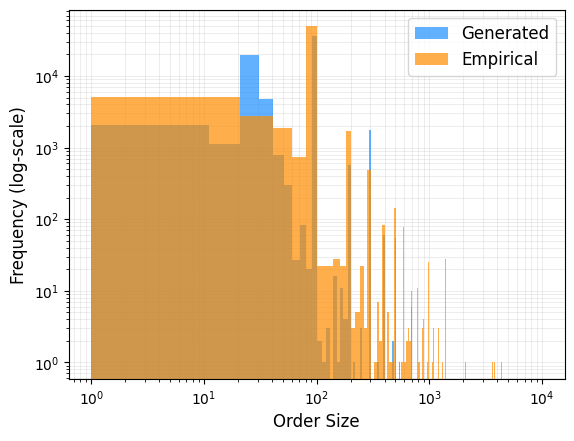

In [32]:
# plot the size of add orders
add_order_gen_sizes = add_order_gen['fill_size']
add_order_real_sizes = add_order_real['fill_size']

plt.hist(add_order_gen_sizes, color='dodgerblue', bins=500, alpha=0.7)
plt.hist(add_order_real_sizes, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.legend(['Generated', 'Empirical'], fontsize=12)
plt.xlabel("Order Size", fontsize=12)
plt.ylabel("Frequency (log-scale)", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/add_order_size.pdf', bbox_inches='tight')

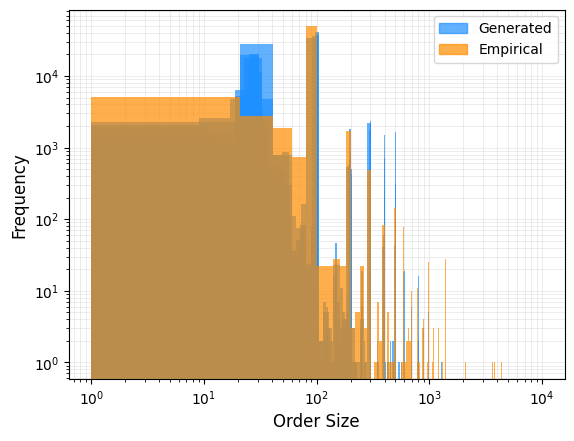

In [33]:
# plot the size of add orders
for sim_date in dates:
    gen_data_df = gen_data_dict[sim_date][:size_gen_seq]
    add_order_gen = gen_data_df[gen_data_df['event_type'] == 1]
    add_order_gen_sizes = add_order_gen['fill_size']
    plt.hist(add_order_gen_sizes, color='dodgerblue', bins=500, alpha=0.7)

plt.hist(add_order_real_sizes, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.legend(handles=[Rectangle((0,0),1,1,color='dodgerblue', alpha=0.7),
                    Rectangle((0,0),1,1,color='darkorange', alpha=0.7)],
                    labels=['Generated', 'Empirical'])
plt.xlabel("Order Size", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# save the plot
if save_gpt_fig:
    plt.savefig(f'{fig_path}/add_order_size_12302019_AAPL.pdf', bbox_inches='tight')

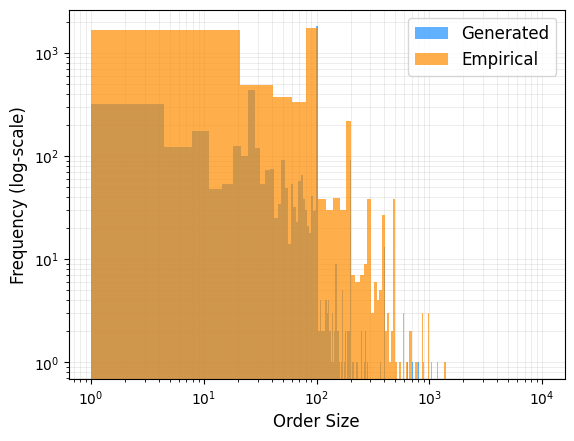

In [34]:
# plot the size of execution orders
exec_order_gen_sizes = exec_order_gen['fill_size']
exec_order_real_sizes = exec_order_real['fill_size']

plt.hist(exec_order_gen_sizes, color='dodgerblue', bins=500, alpha=0.7)
plt.hist(exec_order_real_sizes, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.legend(['Generated', 'Empirical'], fontsize=12)
plt.xlabel("Order Size", fontsize=12)
plt.ylabel("Frequency (log-scale)", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/exec_order_size.pdf', bbox_inches='tight')

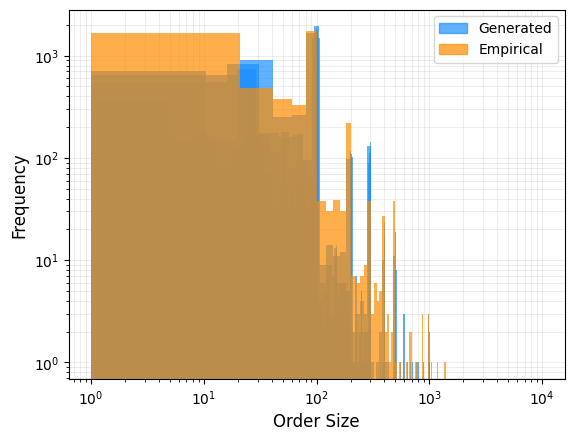

In [35]:
# plot the size of execution orders
for sim_date in dates:
    gen_data_df = gen_data_dict[sim_date][:size_gen_seq]
    exec_order_gen = gen_data_df[gen_data_df['event_type'] == 2]
    # ===== Adjust Data Before Bug Fix: remove row in cancel_order_gen with fill_size=0
    exec_order_gen = exec_order_gen[exec_order_gen['fill_size'] > 0]
    # =====
    exec_order_gen_sizes = exec_order_gen['fill_size']
    plt.hist(exec_order_gen_sizes, color='dodgerblue', bins=500, alpha=0.7)

plt.hist(exec_order_real_sizes, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.legend(handles=[Rectangle((0,0),1,1,color='dodgerblue', alpha=0.7),
                    Rectangle((0,0),1,1,color='darkorange', alpha=0.7)],
                    labels=['Generated', 'Empirical'])
plt.xlabel("Order Size", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# save the plot
if save_gpt_fig:
    plt.savefig(f'{fig_path}/exec_order_size_12302019_AAPL.pdf', bbox_inches='tight')

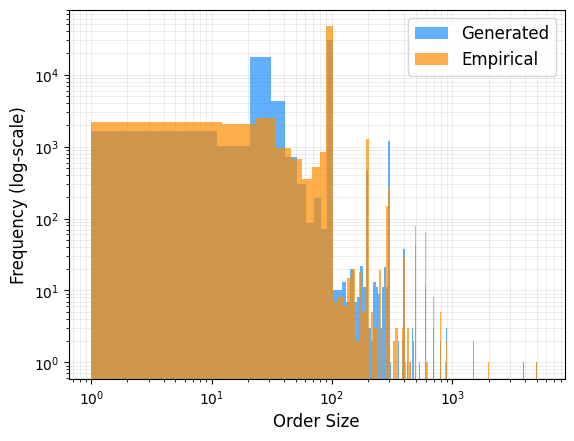

In [36]:
# plot the size of cancel orders
cancel_order_gen_sizes = cancel_order_gen['fill_size']
cancel_order_real_sizes = cancel_order_real['fill_size']

plt.hist(cancel_order_gen_sizes, color='dodgerblue', bins=500, alpha=0.7)
plt.hist(cancel_order_real_sizes, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.legend(['Generated', 'Empirical'], fontsize=12)
plt.xlabel("Order Size", fontsize=12)
plt.ylabel("Frequency (log-scale)", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/cancel_order_size.pdf', bbox_inches='tight')

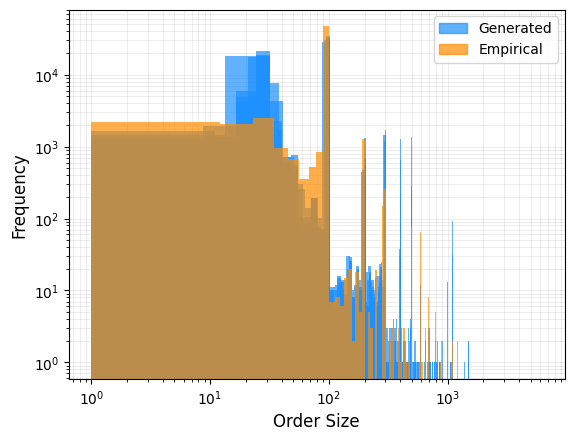

In [37]:
# plot the size of cancel orders
for sim_date in dates:
    gen_data_df = gen_data_dict[sim_date][:size_gen_seq]
    cancel_order_gen = gen_data_df[gen_data_df['event_type'] == 4]
    # ===== Adjust Data Before Bug Fix: remove row in cancel_order_gen with fill_size=0
    cancel_order_gen = cancel_order_gen[cancel_order_gen['fill_size'] > 0]
    # =====
    cancel_order_gen_sizes = cancel_order_gen['fill_size']
    plt.hist(cancel_order_gen_sizes, color='dodgerblue', bins=500, alpha=0.7)

plt.hist(cancel_order_real_sizes, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.legend(handles=[Rectangle((0,0),1,1,color='dodgerblue', alpha=0.7),
                    Rectangle((0,0),1,1,color='darkorange', alpha=0.7)],
                    labels=['Generated', 'Empirical'])
plt.xlabel("Order Size", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# save the plot
if save_gpt_fig:
    plt.savefig(f'{fig_path}/cancel_order_size_12302019_AAPL.pdf', bbox_inches='tight')

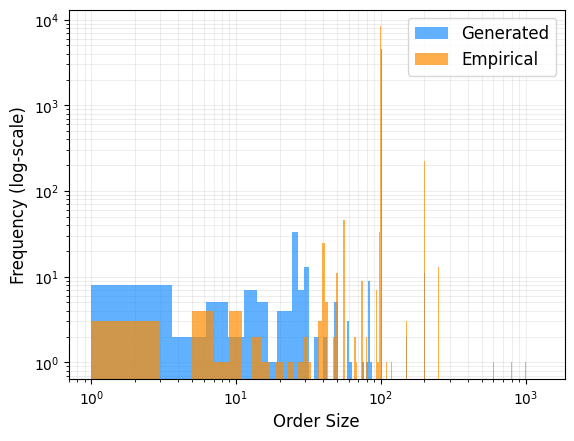

In [38]:
# plot the size of replace orders
replace_order_gen_sizes = replace_order_gen['fill_size']
replace_order_real_sizes = replace_order_real['fill_size']

plt.hist(replace_order_gen_sizes, color='dodgerblue', bins=500, alpha=0.7)
plt.hist(replace_order_real_sizes, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.legend(['Generated', 'Empirical'], fontsize=12)
plt.xlabel("Order Size", fontsize=12)
plt.ylabel("Frequency (log-scale)", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/replace_order_size.pdf', bbox_inches='tight')


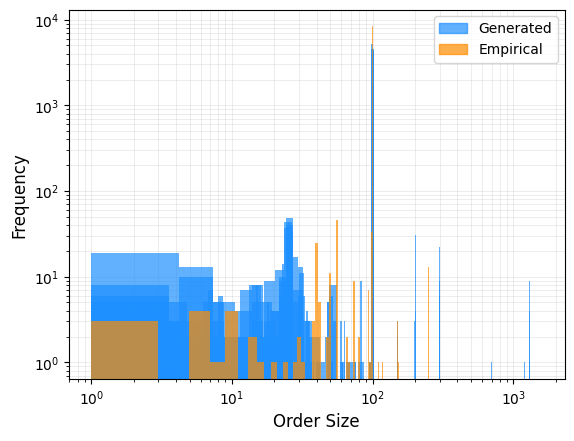

In [39]:
# plot the size of replace orders
for sim_date in dates:
    gen_data_df = gen_data_dict[sim_date][:size_gen_seq]
    replace_order_gen = gen_data_df[gen_data_df['event_type'] == 5]
    replace_order_gen_sizes = replace_order_gen['fill_size']
    plt.hist(replace_order_gen_sizes, color='dodgerblue', bins=500, alpha=0.7)

plt.hist(replace_order_real_sizes, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.legend(handles=[Rectangle((0,0),1,1,color='dodgerblue', alpha=0.7),
                    Rectangle((0,0),1,1,color='darkorange', alpha=0.7)],
                    labels=['Generated', 'Empirical'])
plt.xlabel("Order Size", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# save the plot
if save_gpt_fig:
    plt.savefig(f'{fig_path}/replace_order_size_12302019_AAPL.pdf', bbox_inches='tight')

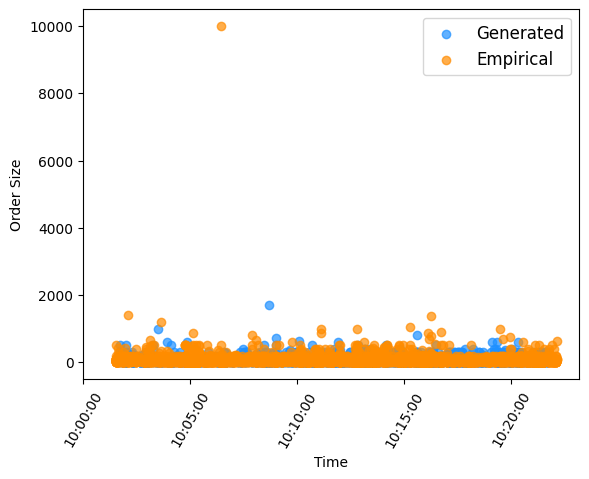

In [40]:
# plot execution order volume over time
plt.scatter(exec_order_gen_times, exec_order_gen_sizes, color='dodgerblue', alpha=0.7)
plt.scatter(exec_order_real_times, exec_order_real_sizes, color='darkorange', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Order Size")
plt.legend(['Generated', 'Empirical'], fontsize=12)

time_mesh = np.arange(
    *time_mesh_range
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

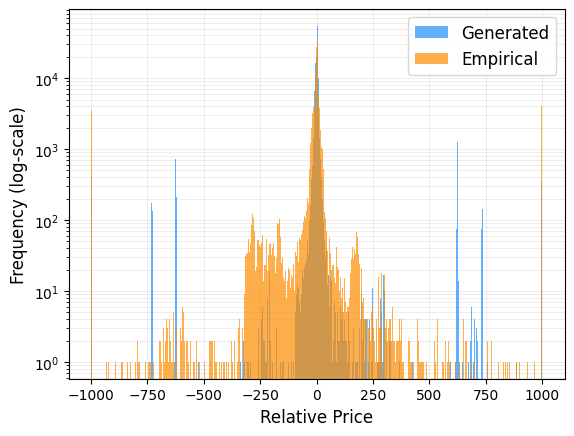

In [41]:
# plot the distribution of relative price values
order_price_dev_gen = gen_data_df['price']
order_price_dev_real = real_msg_df_seq['price']

plt.hist(order_price_dev_gen, color='dodgerblue', bins=500, alpha=0.7)
plt.hist(order_price_dev_real, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
plt.legend(['Generated', 'Empirical'], fontsize=12)
plt.xlabel("Relative Price", fontsize=12)
plt.ylabel("Frequency (log-scale)", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# # save the plot
# plt.savefig(f'{fig_path}/simulated/price_dev_{sim_date}.pdf', bbox_inches='tight')

# high at the tails.. why? shouldn't this be super low % of the data? does this make a difference? TODO: revisit encoding of relative price

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/relative_price_dist.pdf', bbox_inches='tight')

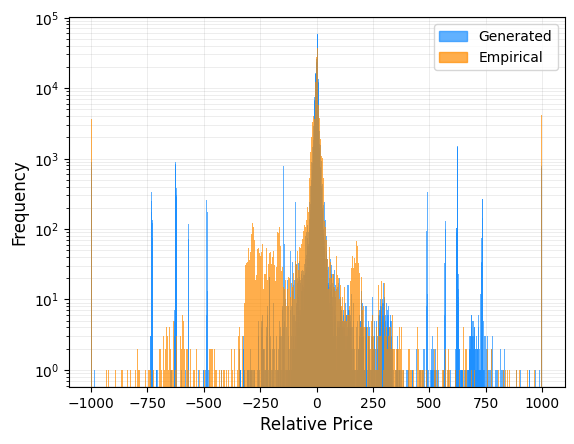

In [42]:
# plot the distribution of relative price values
for sim_date in dates:
    gen_data_df = gen_data_dict[sim_date][:size_gen_seq]
    order_price_dev_gen = gen_data_df['price']
    plt.hist(order_price_dev_gen, color='dodgerblue', bins=500, alpha=0.7)

plt.hist(order_price_dev_real, color='darkorange', bins=500, alpha=0.7)
plt.yscale('log')
plt.legend(handles=[Rectangle((0,0),1,1,color='dodgerblue', alpha=0.7),
                    Rectangle((0,0),1,1,color='darkorange', alpha=0.7)],
                    labels=['Generated', 'Empirical'])
plt.xlabel("Relative Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2, which='both')

# save the plot
if save_gpt_fig:
    plt.savefig(f'{fig_path}/relative_price_dist_12302019_AAPL.pdf', bbox_inches='tight')

## Returns Distributions

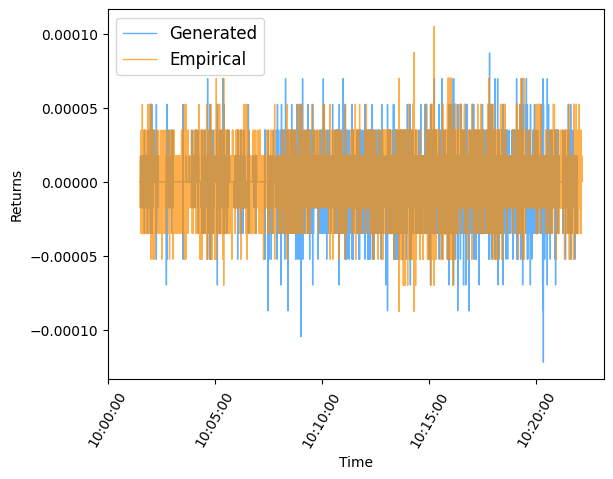

In [43]:
# compute returns
log_prices_gen = np.log(mid_price_gen)
returns_gen = np.diff(log_prices_gen)
log_prices_real = np.log(mid_price_real)
returns_real = np.diff(log_prices_real)

# plot returns
plt.plot(times[1:], returns_gen, lw=1, color='dodgerblue', alpha=0.7)
plt.plot(real_book_df_seq['time'].values[1:], returns_real, lw=1, color='darkorange', alpha=0.7)
plt.legend(['Generated', 'Empirical'], fontsize=12)
plt.xlabel("Time")
plt.ylabel("Returns")
time_mesh = np.arange(
    *time_mesh_range
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/raw_returns_trajectory.pdf', bbox_inches='tight')

In [44]:
# mid_price_real = (real_book_df_seq['1_ask_price'].values + real_book_df_seq['1_bid_price'].values) / 2
gen_data_df

# times = [L1_gen[i][0] for i in range(len(L1_gen))]
# bids = [L1_gen[i][1][0] for i in range(len(L1_gen))]
# asks = [L1_gen[i][2][0] for i in range(len(L1_gen))]
# # convert to dollars
# bids = [(bid / 100) for bid in bids]
# asks = [(ask / 100) for ask in asks]

mid_price_gen 

prices_df_gen = pd.DataFrame({
    'time': times,
    'mid_price': mid_price_gen
})


prices_df_real = pd.DataFrame({
    'time': real_book_df_seq['time'].values,
    'mid_price': mid_price_real
})

# prepare variables to bucket the returns
nano_sec_per_sec = int(1e9)
nano_sec_per_hour = 60 * 60 * nano_sec_per_sec
market_open_time = int(9.5 * nano_sec_per_hour) # 9:30 AM
market_close_time = int(16 * nano_sec_per_hour) # 4:00 PM

market_hours = market_close_time - market_open_time
sec_per_market_day = int(market_hours / nano_sec_per_sec)

market_sec_intervals = np.arange(market_open_time, market_close_time+nano_sec_per_sec, nano_sec_per_sec)
assert len(market_sec_intervals) == sec_per_market_day + 1

market_time_intervals = np.arange(market_open_time, market_close_time+nano_sec_per_sec, nano_sec_per_sec)

# find smallest time value in the data
min_time_gen = min(prices_df_gen['time'])
min_time_real = min(prices_df_real['time'])

# find largest time value in the data
max_time_gen = max(prices_df_gen['time'])
max_time_real = max(prices_df_real['time'])

# filter out time intervals that are outside of the data (min and max time values)
market_time_intervals_gen = market_time_intervals[(market_time_intervals >= min_time_gen) & (market_time_intervals <= max_time_gen)]
market_time_intervals_real = market_time_intervals[(market_time_intervals >= min_time_real) & (market_time_intervals <= max_time_real)]

# how many seconds in each dataset?
print("Seconds in generated data:", len(market_time_intervals_gen))
print("Seconds in real data:", len(market_time_intervals_real))

market_time_intervals_gen


Seconds in generated data: 1226
Seconds in real data: 1238


array([36091000000000, 36092000000000, 36093000000000, ...,
       37314000000000, 37315000000000, 37316000000000])

In [45]:
# bucket the returns
bucketed_returns_gen = []
bucketed_returns_real = []

# bucket the returns for generated data
for i in range(len(market_time_intervals_gen) - 1):
    start_time = market_time_intervals_gen[i]
    end_time = market_time_intervals_gen[i+1]
    
    # filter the mid-prices that fall within the current time interval
    prices_in_interval_gen = prices_df_gen[(prices_df_gen['time'] >= start_time) & (prices_df_gen['time'] < end_time)]['mid_price']
    
    # compute the return over the interval
    if len(prices_in_interval_gen) > 0:
        r = np.log(prices_in_interval_gen.iloc[-1]) - np.log(prices_in_interval_gen.iloc[0])
        bucketed_returns_gen.append(r)
    else:
        # make this nan and then ffill later?
        continue

# repeat for real data
for i in range(len(market_time_intervals_real) - 1):
    start_time = market_time_intervals_real[i]
    end_time = market_time_intervals_real[i+1]
    
    # filter the mid-prices that fall within the current time interval
    prices_in_interval_real = prices_df_real[(prices_df_real['time'] >= start_time) & (prices_df_real['time'] < end_time)]['mid_price']
    
    # compute the return over the interval
    if len(prices_in_interval_real) > 0:
        r = np.log(prices_in_interval_real.iloc[-1]) - np.log(prices_in_interval_real.iloc[0])
        bucketed_returns_real.append(r)
    else:
        # make this nan and then ffill later?
        continue

print("Number of buckets in generated data:", len(bucketed_returns_gen))
print("Number of buckets in real data:", len(bucketed_returns_real))

Number of buckets in generated data: 1225
Number of buckets in real data: 1237


In [46]:
# hack to get plot to work
gaps_gen = len(market_time_intervals_gen) - len(bucketed_returns_gen)
gaps_real = len(market_time_intervals_real) - len(bucketed_returns_real)
gaps_real

1

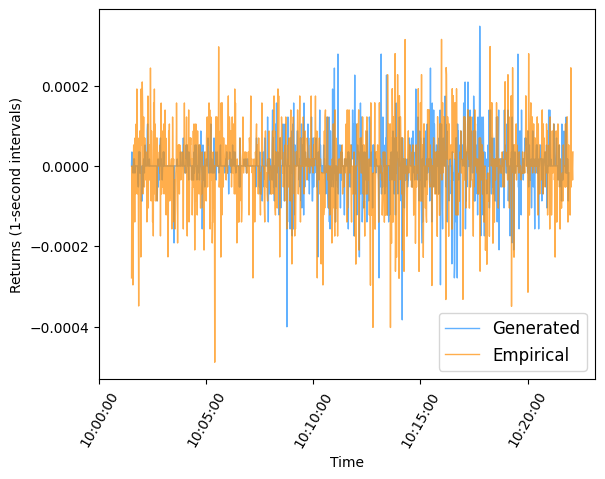

In [47]:
# plot the bucketed returns
plt.plot(market_time_intervals_gen[:-gaps_gen], bucketed_returns_gen, lw=1, color='dodgerblue', alpha=0.7)
plt.plot(market_time_intervals_real[:-gaps_real], bucketed_returns_real, lw=1, color='darkorange', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Returns (1-second intervals)")
plt.legend(['Generated', 'Empirical'], fontsize=12)

time_mesh = np.arange(
    *time_mesh_range
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/bucketed_returns_trajectory.pdf', bbox_inches='tight')

Kurtosis of generated returns: 6.135999484803692
Kurtosis of real returns: 2.4355722396203596


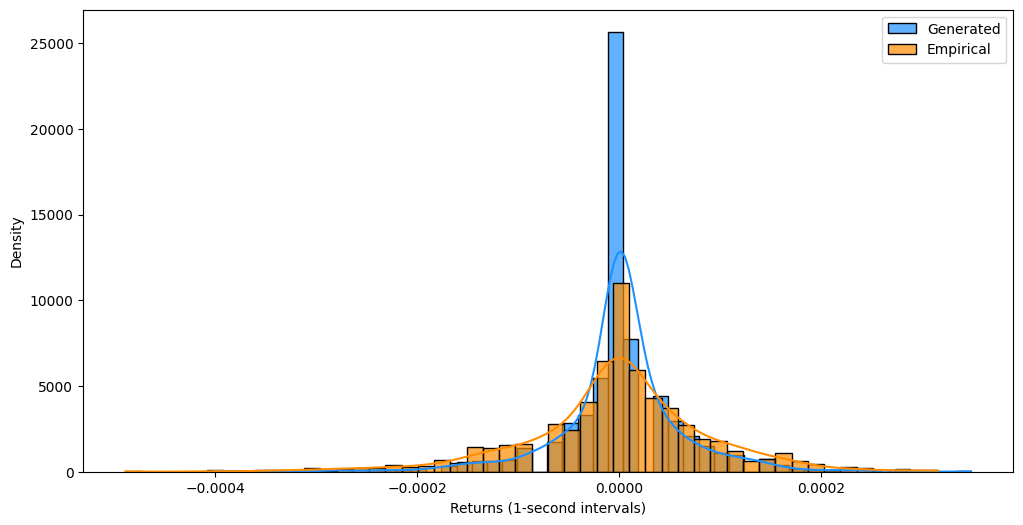

In [48]:
# plot a histogram of the bucketed returns
# bins = 50 
# plt.hist(bucketed_returns_gen, bins=bins, density=True, color='dodgerblue', alpha=0.7)
# plt.hist(bucketed_returns_real, bins=bins, density=True, color='darkorange', alpha=0.7)

bins = 50
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(bucketed_returns_gen, bins=bins, kde=True, ax=ax, stat='density', color='dodgerblue', label='Generated', alpha=0.7)
sns.histplot(bucketed_returns_real, bins=bins, kde=True, ax=ax, stat='density', color='darkorange', label='Empirical', alpha=0.7)
ax.set_xlabel('Returns (1-second intervals)')
ax.set_ylabel('Density') # normalize such that the total area of the histogram equals 1

# compute the kurtosis of the returns (will be 0 for a normal distribution)
print("Kurtosis of generated returns:", stats.kurtosis(bucketed_returns_gen))
print("Kurtosis of real returns:", stats.kurtosis(bucketed_returns_real))

plt.legend()

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/heavy_tails.pdf', bbox_inches='tight')


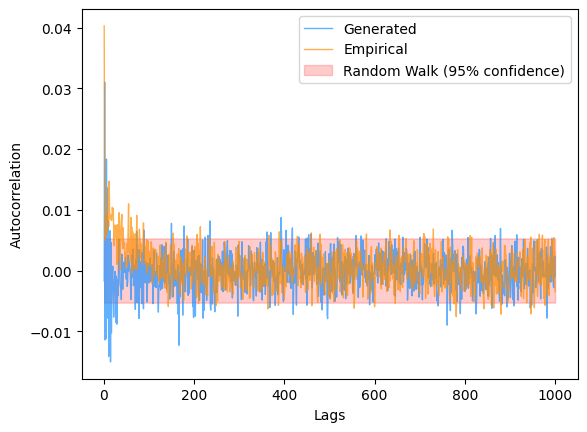

In [49]:
# compute linear ACF
lags_gen, lin_acf_gen = sf.autocorrelation(returns_gen)
lags_real, lin_acf_real = sf.autocorrelation(returns_real)
# lags_gen, lin_acf_gen = sf.autocorrelation(bucketed_returns_gen)
# lags_real, lin_acf_real = sf.autocorrelation(bucketed_returns_real)

# plot ACF
plt.plot(lags_gen, lin_acf_gen, lw=1, color='dodgerblue', alpha=0.7, label='Generated')
plt.plot(lags_real, lin_acf_real, lw=1, color='darkorange', alpha=0.7, label='Empirical')
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
# plt.legend(['Generated', 'Empirical'], fontsize=12)
# plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5, which='both')

# plot confidence intervals
plt.fill_between(lags_gen, -1.96/np.sqrt(len(returns_gen)), 1.96/np.sqrt(len(returns_gen)), color='red', alpha=0.2, label='Random Walk (95% confidence)')
# plt.fill_between(lags_gen, -1.96/np.sqrt(len(bucketed_returns_gen)), 1.96/np.sqrt(len(bucketed_returns_gen)), color='red', alpha=0.2, label='Random Walk (95% confidence)')
plt.legend()

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/lin_acf.pdf', bbox_inches='tight')

H (generated returns): 0.45628681642474
H (empirical returns): 0.5837047349258536
H (random walk): 0.49293305155983497


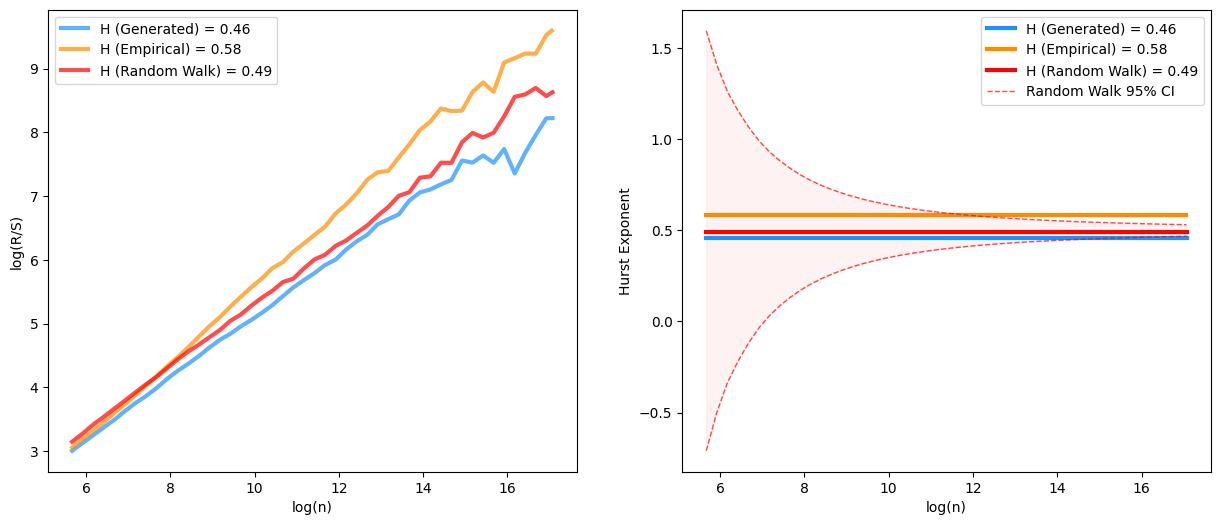

In [50]:
# plot H for returns and random walk series and confidence intervals in side by side plots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# plot H for generated returns series
H_gen, log_n_gen, RSlog_gen = sf.hurst(returns_gen)
print("H (generated returns):", H_gen)
axs[0].plot(log_n_gen, RSlog_gen, lw=3, color='dodgerblue', alpha=0.7, label=(f'H (Generated) = {H_gen:.2f}'))


# plot H for empirical returns series
H_real, log_n_real, RSlog_real = sf.hurst(returns_real)
print("H (empirical returns):", H_real)
axs[0].plot(log_n_real, RSlog_real, lw=3, color='darkorange', alpha=0.7, label=(f'H (Empirical) = {H_real:.2f}'))

# plot H for random walk series
N = len(returns_gen)
random_walk = np.cumsum(np.random.randn(N))
rw_returns = np.diff(random_walk)
H_rw, log_n_rw, RSlog_rw = sf.hurst(rw_returns)
print("H (random walk):", H_rw)
axs[0].plot(log_n_rw, RSlog_rw, lw=3, color='red', alpha=0.7, label=(f'H (Random Walk) = {H_rw:.2f}'))

# add axis labels and legend
axs[0].set_xlabel("log(n)")
axs[0].set_ylabel("log(R/S)")
axs[0].legend()

# collect each length n to evaluate
n_list = [int(np.floor(np.exp2(x))) for x in log_n_gen]
H_LB_list = []
H_UB_list = []
for n in n_list:
    H_LB, H_UB = sf.hurst_confint(n, level='ninetyfive')
    H_LB_list.append(H_LB)
    H_UB_list.append(H_UB)

# plot H against confidence intervals
axs[1].plot(log_n_gen, [H_gen for i in range(len(log_n_gen))], lw=3, color='dodgerblue', label=(f'H (Generated) = {H_gen:.2f}'))
axs[1].plot(log_n_real, [H_real for i in range(len(log_n_real))], lw=3, color='darkorange', label=(f'H (Empirical) = {H_real:.2f}'))
axs[1].plot(log_n_rw, [H_rw for i in range(len(log_n_rw))], lw=3, color='red', label=(f'H (Random Walk) = {H_rw:.2f}'))
axs[1].plot(log_n_gen, H_LB_list, lw=1, color='r', alpha=0.7, ls='--', label='Random Walk 95% CI')
axs[1].plot(log_n_gen, H_UB_list, lw=1, color='r', alpha=0.7, ls='--')
axs[1].fill_between(log_n_gen, H_LB_list, H_UB_list, color='r', alpha=0.05)

# add axis labels and legend
axs[1].set_xlabel("log(n)")
axs[1].set_ylabel("Hurst Exponent")
axs[1].legend()

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/H_lin_acf.pdf', bbox_inches='tight')


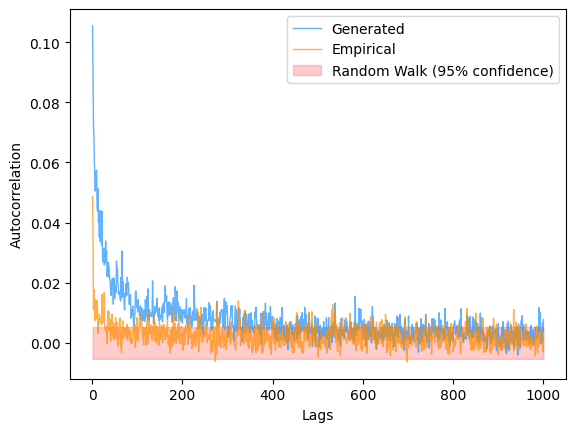

In [51]:
# compute sqr ACF
lags_gen, sqr_acf_gen = sf.autocorrelation(np.array(returns_gen)**2)
lags_real, sqr_acf_real = sf.autocorrelation(np.array(returns_real)**2)
# lags_gen, sqr_acf_gen = sf.autocorrelation(np.array(bucketed_returns_gen)**2)
# lags_real, sqr_acf_real = sf.autocorrelation(np.array(bucketed_returns_real)**2)

# plot ACF
plt.plot(lags_gen, sqr_acf_gen, lw=1, color='dodgerblue', alpha=0.7, label='Generated')
plt.plot(lags_real, sqr_acf_real, lw=1, color='darkorange', alpha=0.7, label='Empirical')
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
# plt.legend(['Generated', 'Empirical'], fontsize=12)

# plot confidence intervals
plt.fill_between(lags_gen, -1.96/np.sqrt(len(returns_gen)), 1.96/np.sqrt(len(returns_gen)), color='red', alpha=0.2, label='Random Walk (95% confidence)')
# plt.fill_between(lags_gen, -1.96/np.sqrt(len(bucketed_returns_gen)), 1.96/np.sqrt(len(bucketed_returns_gen)), color='red', alpha=0.2, label='Random Walk (95% confidence)')
plt.legend()

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/volatility_clustering.pdf', bbox_inches='tight')

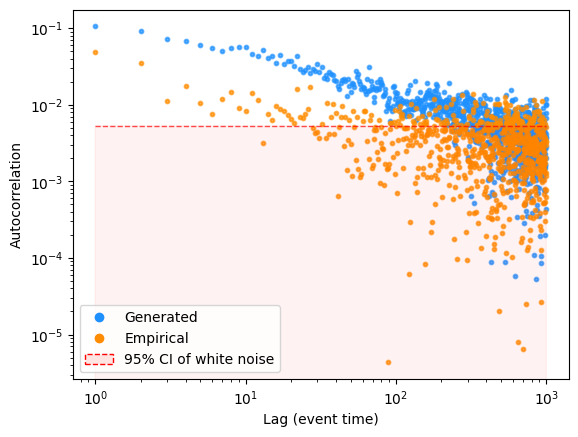

In [52]:
# compute sqr ACF
lags_gen, sqr_acf_gen = sf.autocorrelation(np.array(returns_gen)**2)
lags_real, sqr_acf_real = sf.autocorrelation(np.array(returns_real)**2)
# lags_gen, sqr_acf_gen = sf.autocorrelation(np.array(bucketed_returns_gen)**2)
# lags_real, sqr_acf_real = sf.autocorrelation(np.array(bucketed_returns_real)**2)

# plot ACF
# plt.plot(lags_gen, sqr_acf_gen, lw=1.5, color='dodgerblue', alpha=0.7, label='Generated')
# plt.plot(lags_real, sqr_acf_real, lw=1.5, color='darkorange', alpha=0.7, label='Empirical')
plt.scatter(lags_gen, sqr_acf_gen, lw=1.5, color='dodgerblue', alpha=0.7, label='Generated', s=7)
plt.scatter(lags_real, sqr_acf_real, lw=1.5, color='darkorange', alpha=0.7, label='Empirical', s=7)
plt.xlabel("Lag (event time)")
plt.ylabel("Autocorrelation")
# plt.legend(['Generated', 'Empirical'], fontsize=12)

# plot confidence intervals
plt.plot(lags_gen, [(1.96/np.sqrt(len(returns_gen))) for _ in range(len(lags_gen))], lw=1, color='red', alpha=0.7, ls='--')
plt.plot(lags_gen, [-(1.96/np.sqrt(len(returns_gen))) for _ in range(len(lags_gen))], lw=1, color='red', alpha=0.7, ls='--')
plt.fill_between(lags_gen, -1.96/np.sqrt(len(returns_gen)), 1.96/np.sqrt(len(returns_gen)), color='red', alpha=0.05, label='95% CI of white noise')

# plt.fill_between(lags_gen, -1.96/np.sqrt(len(bucketed_returns_gen)), 1.96/np.sqrt(len(bucketed_returns_gen)), color='red', alpha=0.2, label='Random Walk (95% confidence)')

plt.yscale('log')
plt.xscale('log')
# plt.legend()

# make custom legend
legend_elements = [Line2D([0], [0], marker='o', lw=1.5, linestyle='None', color='dodgerblue', label='Generated'),
                   Line2D([0], [0], marker='o', lw=1.5, linestyle='None', color='darkorange', label='Empirical'),
            # Line2D([0], [0], lw=1.5, color='dodgerblue', label='Generated'),
            #        Line2D([0], [0], lw=1.5, color='darkorange', label='Empirical'),
                   Patch(facecolor='mistyrose', label='95% CI of white noise', edgecolor='red', ls='--', lw=1)]
plt.legend(handles=legend_elements)

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/volatility_clustering.pdf', bbox_inches='tight')

# plt.savefig(f'{sim_data_path}{sim_date}/figs/volatility_clustering.pdf', bbox_inches='tight')

H (generated squared returns): 0.7371463449606731
H (empirical squared returns): 0.6754123901407636
H (random walk squared returns): 0.46965231205436714


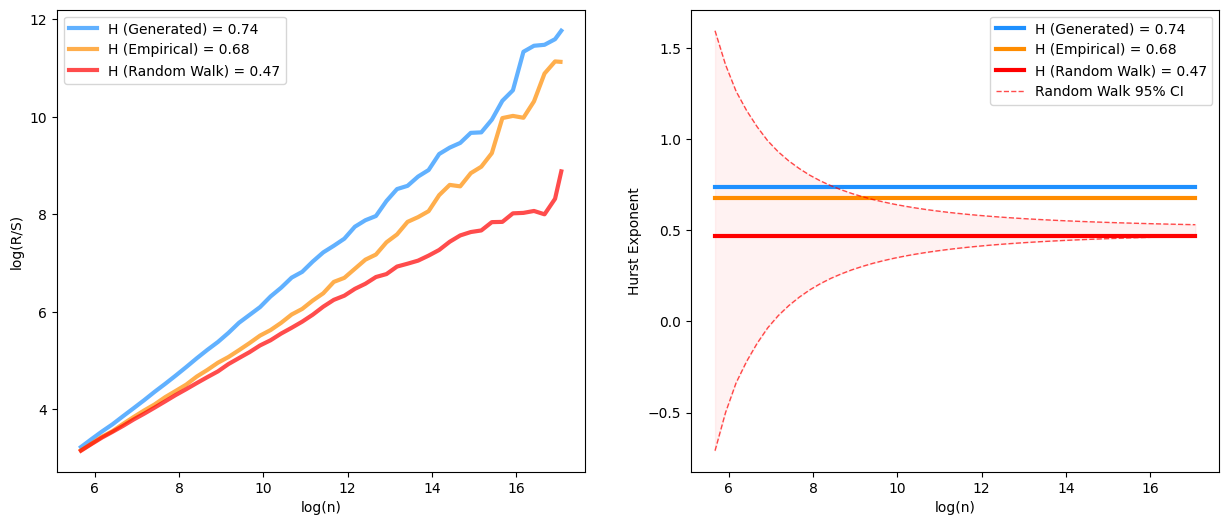

In [53]:
# plot H for squared returns and random walk series and confidence intervals in side by side plots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# plot H for generated squared returns series
H_gen, log_n_gen, RSlog_gen = sf.hurst(np.array(returns_gen)**2)
print("H (generated squared returns):", H_gen)
axs[0].plot(log_n_gen, RSlog_gen, lw=3, color='dodgerblue', alpha=0.7, label=(f'H (Generated) = {H_gen:.2f}'))

# plot H for empirical squared returns series
H_real, log_n_real, RSlog_real = sf.hurst(np.array(returns_real)**2)
print("H (empirical squared returns):", H_real)
axs[0].plot(log_n_real, RSlog_real, lw=3, color='darkorange', alpha=0.7, label=(f'H (Empirical) = {H_real:.2f}'))

# plot H for random walk series
N = len(returns_gen)
random_walk = np.cumsum(np.random.randn(N))
rw_returns = np.diff(random_walk)
H_rw, log_n_rw, RSlog_rw = sf.hurst(rw_returns)
print("H (random walk squared returns):", H_rw)
axs[0].plot(log_n_rw, RSlog_rw, lw=3, color='red', alpha=0.7, label=(f'H (Random Walk) = {H_rw:.2f}'))

# add axis labels and legend
axs[0].set_xlabel("log(n)")
axs[0].set_ylabel("log(R/S)")
axs[0].legend()

# collect each length n to evaluate
n_list = [int(np.floor(np.exp2(x))) for x in log_n_gen]
H_LB_list = []
H_UB_list = []
for n in n_list:
    H_LB, H_UB = sf.hurst_confint(n, level='ninetyfive')
    H_LB_list.append(H_LB)
    H_UB_list.append(H_UB)

# plot H against confidence intervals
axs[1].plot(log_n_gen, [H_gen for i in range(len(log_n_gen))], lw=3, color='dodgerblue', label=(f'H (Generated) = {H_gen:.2f}'))
axs[1].plot(log_n_real, [H_real for i in range(len(log_n_real))], lw=3, color='darkorange', label=(f'H (Empirical) = {H_real:.2f}'))
axs[1].plot(log_n_rw, [H_rw for i in range(len(log_n_rw))], lw=3, color='red', label=(f'H (Random Walk) = {H_rw:.2f}'))
axs[1].plot(log_n_gen, H_LB_list, lw=1, color='r', alpha=0.7, ls='--', label='Random Walk 95% CI')
axs[1].plot(log_n_gen, H_UB_list, lw=1, color='r', alpha=0.7, ls='--')
axs[1].fill_between(log_n_gen, H_LB_list, H_UB_list, color='r', alpha=0.05)

# add axis labels and legend
axs[1].set_xlabel("log(n)")
axs[1].set_ylabel("Hurst Exponent")
axs[1].legend()

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/H_volatility_clustering.pdf', bbox_inches='tight')

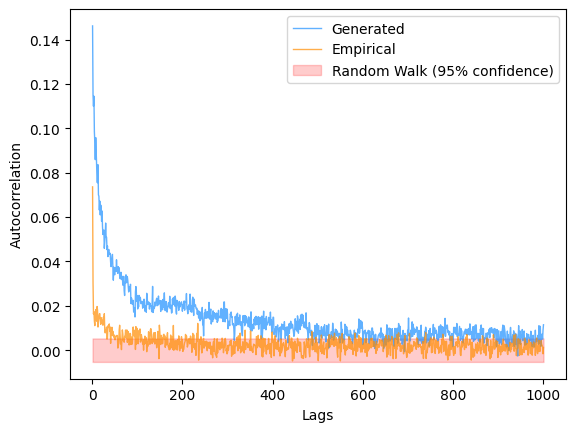

In [54]:
# compute absolute ACF
max_lag = 1000 # 2500
abs_lags_gen, abs_acf_gen = sf.autocorrelation(np.abs(returns_gen), max_lag=max_lag)
abs_lags_real, abs_acf_real = sf.autocorrelation(np.abs(returns_real), max_lag=max_lag)

# plot ACF
plt.plot(abs_lags_gen, abs_acf_gen, lw=1, color='dodgerblue', alpha=0.7, label='Generated')
plt.plot(abs_lags_real, abs_acf_real, lw=1, color='darkorange', alpha=0.7, label='Empirical')
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
# plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5, which='both')
# plt.legend(['Generated', 'Empirical'], fontsize=12)

# plot confidence intervals
plt.fill_between(abs_lags_gen, 1.96/np.sqrt(len(returns_gen)), -1.96/np.sqrt(len(returns_gen)), color='red', alpha=0.2, label='Random Walk (95% confidence)')
plt.legend()

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/nonlin_dependence.pdf', bbox_inches='tight')

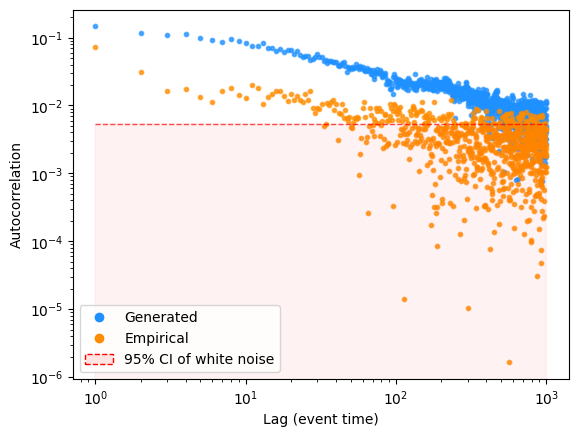

In [55]:
# compute absolute ACF
max_lag = 1000 # 2500
abs_lags_gen, abs_acf_gen = sf.autocorrelation(np.abs(returns_gen), max_lag=max_lag)
abs_lags_real, abs_acf_real = sf.autocorrelation(np.abs(returns_real), max_lag=max_lag)
# abs_lags_gen, abs_acf_gen = sf.autocorrelation(np.abs(np.array(bucketed_returns_gen)))
# abs_lags_real, abs_acf_real = sf.autocorrelation(np.abs(np.array(bucketed_returns_real)))

# plot ACF
# plt.plot(abs_lags_gen, abs_acf_gen, lw=1.5, color='dodgerblue', alpha=0.7, label='Generated')
# plt.plot(abs_lags_real, abs_acf_real, lw=1.5, color='darkorange', alpha=0.7, label='Empirical')
plt.scatter(abs_lags_gen, abs_acf_gen, lw=1.5, color='dodgerblue', alpha=0.7, label='Generated', s=7)
plt.scatter(abs_lags_real, abs_acf_real, lw=1.5, color='darkorange', alpha=0.7, label='Empirical', s=7)
plt.xlabel("Lag (event time)")
plt.ylabel("Autocorrelation")
# plt.legend(['Generated', 'Empirical'], fontsize=12)

# plot confidence intervals
plt.plot(abs_lags_gen, [(1.96/np.sqrt(len(returns_gen))) for _ in range(len(abs_lags_gen))], lw=1, color='red', alpha=0.7, ls='--')
plt.plot(abs_lags_gen, [-(1.96/np.sqrt(len(returns_gen))) for _ in range(len(abs_lags_gen))], lw=1, color='red', alpha=0.7, ls='--')
plt.fill_between(abs_lags_gen, -1.96/np.sqrt(len(returns_gen)), 1.96/np.sqrt(len(returns_gen)), color='red', alpha=0.05, label='95% CI of white noise')

# plt.fill_between(abs_lags_gen, -1.96/np.sqrt(len(bucketed_returns_gen)), 1.96/np.sqrt(len(bucketed_returns_gen)), color='red', alpha=0.2, label='Random Walk (95% confidence)')

plt.yscale('log')
plt.xscale('log')
# plt.legend()

# make custom legend
legend_elements = [Line2D([0], [0], marker='o', lw=1.5, linestyle='None', color='dodgerblue', label='Generated'),
                   Line2D([0], [0], marker='o', lw=1.5, linestyle='None', color='darkorange', label='Empirical'),
            # Line2D([0], [0], lw=1.5, color='dodgerblue', label='Generated'),
            #        Line2D([0], [0], lw=1.5, color='darkorange', label='Empirical'),
                   Patch(facecolor='mistyrose', label='95% CI of white noise', edgecolor='red', ls='--', lw=1)]
plt.legend(handles=legend_elements)

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/nonlin_dependence.pdf', bbox_inches='tight')

# plt.savefig(f'{sim_data_path}{sim_date}/figs/nonlin_dependence.pdf', bbox_inches='tight')

H (generated absolute returns): 0.7775741861467239
H (empirical absolute returns): 0.6778238654401784
H (random walk absolute returns): 0.5020684333748837


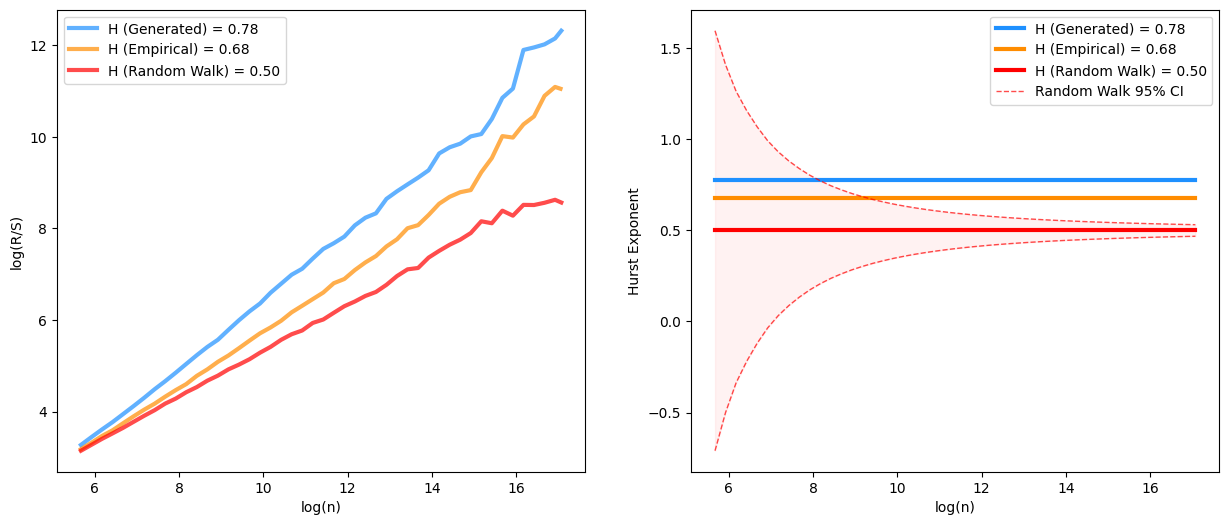

In [56]:
# plot H for absolute returns and random walk series and confidence intervals in side by side plots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# plot H for generated absolute returns series
H_gen, log_n_gen, RSlog_gen = sf.hurst(np.abs(returns_gen))
print("H (generated absolute returns):", H_gen)
axs[0].plot(log_n_gen, RSlog_gen, lw=3, color='dodgerblue', alpha=0.7, label=(f'H (Generated) = {H_gen:.2f}'))

# plot H for empirical absolute returns series
H_real, log_n_real, RSlog_real = sf.hurst(np.abs(returns_real))
print("H (empirical absolute returns):", H_real)
axs[0].plot(log_n_real, RSlog_real, lw=3, color='darkorange', alpha=0.7, label=(f'H (Empirical) = {H_real:.2f}'))

# plot H for random walk series
N = len(returns_gen)
random_walk = np.cumsum(np.random.randn(N))
rw_returns = np.diff(random_walk)
H_rw, log_n_rw, RSlog_rw = sf.hurst(np.abs(rw_returns))
print("H (random walk absolute returns):", H_rw)
axs[0].plot(log_n_rw, RSlog_rw, lw=3, color='red', alpha=0.7, label=(f'H (Random Walk) = {H_rw:.2f}'))

# add axis labels and legend
axs[0].set_xlabel("log(n)")
axs[0].set_ylabel("log(R/S)")
axs[0].legend()

# collect each length n to evaluate
n_list = [int(np.floor(np.exp2(x))) for x in log_n_gen]
H_LB_list = []
H_UB_list = []
for n in n_list:
    H_LB, H_UB = sf.hurst_confint(n, level='ninetyfive')
    H_LB_list.append(H_LB)
    H_UB_list.append(H_UB)

# plot H against confidence intervals
axs[1].plot(log_n_gen, [H_gen for i in range(len(log_n_gen))], lw=3, color='dodgerblue', label=(f'H (Generated) = {H_gen:.2f}'))
axs[1].plot(log_n_real, [H_real for i in range(len(log_n_real))], lw=3, color='darkorange', label=(f'H (Empirical) = {H_real:.2f}'))
axs[1].plot(log_n_rw, [H_rw for i in range(len(log_n_rw))], lw=3, color='red', label=(f'H (Random Walk) = {H_rw:.2f}'))
axs[1].plot(log_n_gen, H_LB_list, lw=1, color='r', alpha=0.7, ls='--', label='Random Walk 95% CI')
axs[1].plot(log_n_gen, H_UB_list, lw=1, color='r', alpha=0.7, ls='--')
axs[1].fill_between(log_n_gen, H_LB_list, H_UB_list, color='r', alpha=0.05)

# add axis labels and legend
axs[1].set_xlabel("log(n)")
axs[1].set_ylabel("Hurst Exponent")
axs[1].legend()

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/H_nonlin_dependence.pdf', bbox_inches='tight')

In [57]:
# estimate H for absolute returns
# max_lag = 1000
# alpha_val_gen_list = []
H_gen_list = []
for sim_date in dates:
    log_prices_gen = np.log(mid_price_gen_dict[sim_date])
    returns_gen = np.diff(log_prices_gen)
    H_gen, log_n_gen, RSlog_gen = sf.hurst(np.abs(returns_gen))
    H_gen_list.append(H_gen)
    # abs_lags_gen, abs_acf_gen = sf.autocorrelation(np.abs(returns_gen), max_lag=max_lag)
    # returns_fit_gen = powerlaw.Fit(abs_acf_gen)
    # alpha_val_gen_list.append(returns_fit_gen.power_law.alpha)

# print("Mean alpha value for generated data:", np.mean(alpha_val_gen_list))
# print("Std of alpha values for generated data:", np.std(alpha_val_gen_list))

H_real, log_n_real, RSlog_real = sf.hurst(np.abs(returns_real))

print("Mean H value for generated data:", np.mean(H_gen_list))
print("Std of H values for generated data:", np.std(H_gen_list))

print("H value for real data:", H_real)


Mean H value for generated data: 0.7746612067440555
Std of H values for generated data: 0.04707310435348852
H value for real data: 0.6778238654401784


In [57]:
import scipy.signal as ss

# detrended fluctuation analysis

def calc_rms(x, scale):
    """
    windowed Root Mean Square (RMS) with linear detrending.
    
    Args:
    -----
      *x* : numpy.array
        one dimensional data vector
      *scale* : int
        length of the window in which RMS will be calculaed
    Returns:
    --------
      *rms* : numpy.array
        RMS data in each window with length len(x)//scale
    """
    # making an array with data divided in windows
    shape = (x.shape[0]//scale, scale)
    X = np.lib.stride_tricks.as_strided(x,shape=shape)
    # vector of x-axis points to regression
    scale_ax = np.arange(scale)
    rms = np.zeros(X.shape[0])
    for e, xcut in enumerate(X):
        coeff = np.polyfit(scale_ax, xcut, 1)
        xfit = np.polyval(coeff, scale_ax)
        # detrending and computing RMS of each window
        rms[e] = np.sqrt(np.mean((xcut-xfit)**2))
    return rms

def dfa(x, scale_lim=[5,9], scale_dens=0.25, show=False):
    """
    Detrended Fluctuation Analysis - measures power law scaling coefficient
    of the given signal *x*.

    More details about the algorithm you can find e.g. here:
    Hardstone, R. et al. Detrended fluctuation analysis: A scale-free 
    view on neuronal oscillations, (2012).

    Args:
    -----
      *x* : numpy.array
        one dimensional data vector
      *scale_lim* = [5,9] : list of length 2 
        boundaries of the scale, where scale means windows among which RMS
        is calculated. Numbers from list are exponents of 2 to the power
        of X, eg. [5,9] is in fact [2**5, 2**9].
        You can think of it that if your signal is sampled with F_s = 128 Hz,
        then the lowest considered scale would be 2**5/128 = 32/128 = 0.25,
        so 250 ms.
      *scale_dens* = 0.25 : float
        density of scale divisions, eg. for 0.25 we get 2**[5, 5.25, 5.5, ... ] 
      *show* = False
        if True it shows matplotlib log-log plot.
    Returns:
    --------
      *scales* : numpy.array
        vector of scales (x axis)
      *fluct* : numpy.array
        fluctuation function values (y axis)
      *alpha* : float
        estimation of DFA exponent
    """
    # cumulative sum of data with substracted offset
    y = np.cumsum(x - np.mean(x))
    scales = (2**np.arange(scale_lim[0], scale_lim[1], scale_dens)).astype(int)
    fluct = np.zeros(len(scales))
    # computing RMS for each window
    for e, sc in enumerate(scales):
        fluct[e] = np.sqrt(np.mean(calc_rms(y, sc)**2))
    # fitting a line to rms data
    # coeff = np.polyfit(np.log2(scales), np.log2(fluct), 1)

    # fitting a line to rms data (compute fit and square error)
    # https://stackoverflow.com/questions/29632733/how-to-get-the-sum-of-least-squares-error-from-polyfit-in-one-dimension-python
    coeff, residuals, _, _, _ = np.polyfit(np.log2(scales), np.log2(fluct), 1, full=True)
    # report error
    if show:
        print('DFA error (sum of squared residuals):', residuals[0]) # Residual sum of squares (RSS)
        # https://stats.stackexchange.com/questions/419718/what-is-the-conceptual-difference-between-residual-sum-of-squares-rss-and-resi#:~:text=RSS%20shows%20the%20aggregate%20squared,deviation%20of%20the%20dependent%20variable.
        rse = np.sqrt((residuals[0] / (len(scales) - 2))) # Residual Standard Error (RSE)
        print('DFA std (residual standard error):', rse)
    if show:
        fluctfit = 2**np.polyval(coeff,np.log2(scales))
        plt.loglog(scales, fluct, 'bo')
        plt.loglog(scales, fluctfit, 'r', label=r'$\alpha$ = %0.2f'%coeff[0])
        plt.title('DFA')
        plt.xlabel(r'$\log_{10}$(time window)')
        plt.ylabel(r'$\log_{10}$<F(t)>')
        plt.legend()
        plt.show()
    return scales, fluct, coeff[0]


In [58]:
# determine scale window limit (DFA still behaves nicely for small subinterval sizes so we can start from 2**4=16)
# ref: https://arxiv.org/pdf/cond-mat/0103510
print(np.log2(len(np.abs(returns_gen))))
print(np.log2(len(np.abs(bucketed_returns_gen))))
print(np.log2(len(np.abs(returns_real))))
print(np.log2(len(np.abs(bucketed_returns_real))))

win_UB = int(np.log2(len(np.abs(returns_gen))) // 1)
# win_UB = 15

2**win_UB

17.07028868996168
10.258566033889933
17.051251432485078
10.27262978497637


131072

DFA error (sum of squared residuals): 0.48817344756734604
DFA std (residual standard error): 0.11334315009220847


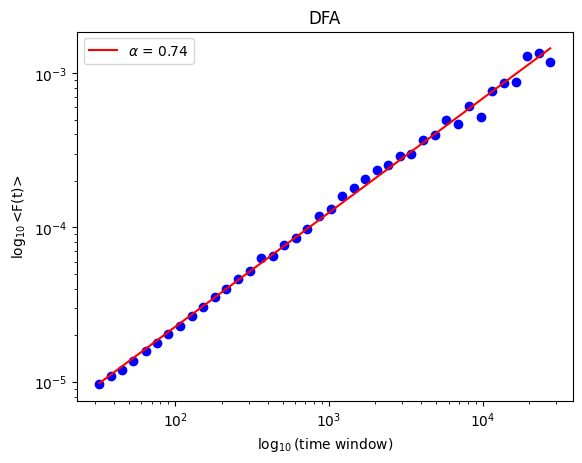

(Generated) Estimated DFA exponent: 0.7389248831311802
(Generated) Correlation decay exponent:  0.5221502337376396


In [ ]:
# use the DFA method to compute the Hurst exponent for the (Generated) absolute returns series
scales, fluct, alpha = dfa(np.abs(returns_gen), scale_lim=[5,15], show=True) # [5,15] -> best fit
# scales, fluct, alpha = dfa(np.abs(bucketed_returns_gen), scale_lim=[4,10], show=True)
print("(Generated) Estimated DFA exponent: {}".format(alpha)) # scaling exponent is generalization of H
gamma = 2 - (2*alpha) # correlation decay exponent is gamma
print("(Generated) Correlation decay exponent: ", gamma)

DFA error (sum of squared residuals): 0.23707835953421663
DFA std (residual standard error): 0.0789867343182946


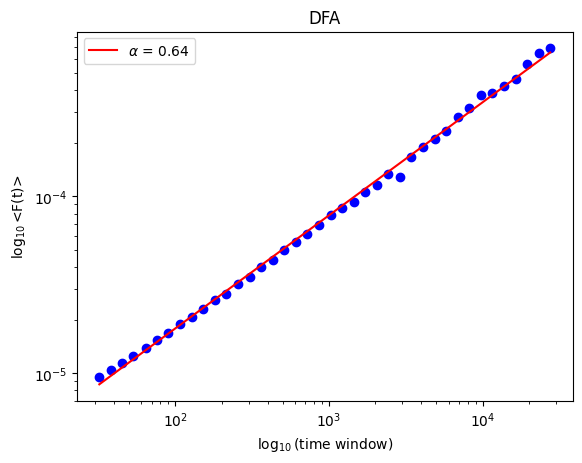

(Empirical) Estimated DFA exponent: 0.6389878085050331
(Empirical) Correlation decay exponent:  0.7220243829899338


In [81]:
# use the DFA method to compute the Hurst exponent for the (Empirical) absolute returns series
scales, fluct, alpha_real = dfa(np.abs(returns_real), scale_lim=[5,15], show=True)
# scales, fluct, alpha_real = dfa(np.abs(bucketed_returns_real), scale_lim=[4,10], show=True)
print("(Empirical) Estimated DFA exponent: {}".format(alpha_real)) # scaling exponent is generalization of H
gamma_real = 2 - (2*alpha_real) # correlation decay exponent is gamma_real
print("(Empirical) Correlation decay exponent: ", gamma_real)

In [ ]:
# compute the DFA exponent and correlation decay exponent for each generated absolute returns series
alpha_dfa_gen_list = []
gamma_gen_list = []

for sim_date in dates:
    log_prices_gen = np.log(mid_price_gen_dict[sim_date])
    returns_gen = np.diff(log_prices_gen)
    scales, fluct, alpha = dfa(np.abs(returns_gen), scale_lim=[5,15])
    alpha_dfa_gen_list.append(alpha)
    gamma = 2 - (2*alpha)
    gamma_gen_list.append(gamma)

print("Mean DFA exponent for generated data:", np.mean(alpha_dfa_gen_list))
print("Std of DFA exponents for generated data:", np.std(alpha_dfa_gen_list))

print("Mean correlation decay exponent for generated data:", np.mean(gamma_gen_list))
print("Std of correlation decay exponents for generated data:", np.std(gamma_gen_list))

# compare to real data
print("DFA exponent for real data:", alpha_real)
print("Correlation decay exponent for real data:", gamma_real)

Mean DFA exponent for generated data: 0.7280362671480594
Std of DFA exponents for generated data: 0.023160675077510077
Mean correlation decay exponent for generated data: 0.5439274657038815
Std of correlation decay exponents for generated data: 0.046321350155020154
DFA exponent for real data: 0.6389878085050331
Correlation decay exponent for real data: 0.7220243829899338


In [31]:
# determine the earliest last timestamp in the simulated data
min_time_gen_list = []
for sim_date in dates:
    L1_gen = L1_gen_dict[sim_date]
    min_time_gen_list.append(L1_gen[-1][0])
min_last_time_gen = min(min_time_gen_list)
print("Earliest last timestamp in the simulated data:", min_last_time_gen)
adj_time_intervals_gen = market_time_intervals_gen[(market_time_intervals_gen <= min_last_time_gen)]

bucketed_bid_vol_gen_list = []
bucketed_ask_vol_gen_list = []

for sim_date in dates:
    L1_gen = L1_gen_dict[sim_date]
    times = [L1_gen[i][0] for i in range(len(L1_gen))]
    L1_gen_bid_vol = [L1_gen[i][1][1] for i in range(len(L1_gen))]
    L1_gen_ask_vol = [L1_gen[i][2][1] for i in range(len(L1_gen))]
    L1_gen_vol_df = pd.DataFrame({
        'time': times,
        'bid_vol': L1_gen_bid_vol,
        'ask_vol': L1_gen_ask_vol
    })

    # bucket the average bid and ask volumes for each second
    bucketed_bid_vol_gen = []
    bucketed_ask_vol_gen = []

    # bucket the generated data
    for i in range(len(adj_time_intervals_gen) - 1):
        start_time = adj_time_intervals_gen[i]
        end_time = adj_time_intervals_gen[i+1]

        # filter the bid and ask volumes that fall within the current time interval
        bid_vol_in_interval_gen = L1_gen_vol_df[(L1_gen_vol_df['time'] >= start_time) & (L1_gen_vol_df['time'] < end_time)]['bid_vol']
        ask_vol_in_interval_gen = L1_gen_vol_df[(L1_gen_vol_df['time'] >= start_time) & (L1_gen_vol_df['time'] < end_time)]['ask_vol']

        # compute the average bid and ask volumes over the interval
        if len(bid_vol_in_interval_gen) > 0 and len(ask_vol_in_interval_gen) > 0:
            avg_bid_vol = np.mean(bid_vol_in_interval_gen)
            avg_ask_vol = np.mean(ask_vol_in_interval_gen)
            bucketed_bid_vol_gen.append(avg_bid_vol)
            bucketed_ask_vol_gen.append(avg_ask_vol)
        else:
            # make this nan and then ffill later?
            print("No data in interval")
            continue
    
    # bucketed_bid_vol_gen_list.append(bucketed_bid_vol_gen)
    # bucketed_ask_vol_gen_list.append(bucketed_ask_vol_gen)
    bucketed_bid_vol_gen_list += bucketed_bid_vol_gen
    bucketed_ask_vol_gen_list += bucketed_ask_vol_gen

# bucket the real data
bucketed_bid_vol_real = []
bucketed_ask_vol_real = []
L1_real_vol_df = pd.DataFrame({
    'time': real_book_df_seq['time'].values,
    'bid_vol': real_book_df_seq['1_bid_vol'].values,
    'ask_vol': real_book_df_seq['1_ask_vol'].values
})
for i in range(len(adj_time_intervals_gen) - 1):
    start_time = adj_time_intervals_gen[i]
    end_time = adj_time_intervals_gen[i+1]

    # filter the bid and ask volumes that fall within the current time interval
    bid_vol_in_interval_real = L1_real_vol_df[(L1_real_vol_df['time'] >= start_time) & (L1_real_vol_df['time'] < end_time)]['bid_vol']
    ask_vol_in_interval_real = L1_real_vol_df[(L1_real_vol_df['time'] >= start_time) & (L1_real_vol_df['time'] < end_time)]['ask_vol']

    # compute the average bid and ask volumes over the interval
    if len(bid_vol_in_interval_real) > 0 and len(ask_vol_in_interval_real) > 0:
        avg_bid_vol = np.mean(bid_vol_in_interval_real)
        avg_ask_vol = np.mean(ask_vol_in_interval_real)
        bucketed_bid_vol_real.append(avg_bid_vol)
        bucketed_ask_vol_real.append(avg_ask_vol)
    else:
        # make this nan and then ffill later?
        print("No data in interval")
        continue

# use sns.lineplot to plot the average bid and ask volumes over time using all simulated data
# x axis is time, y axis is average bid and ask volumes

Earliest last timestamp in the simulated data: 37148481433299


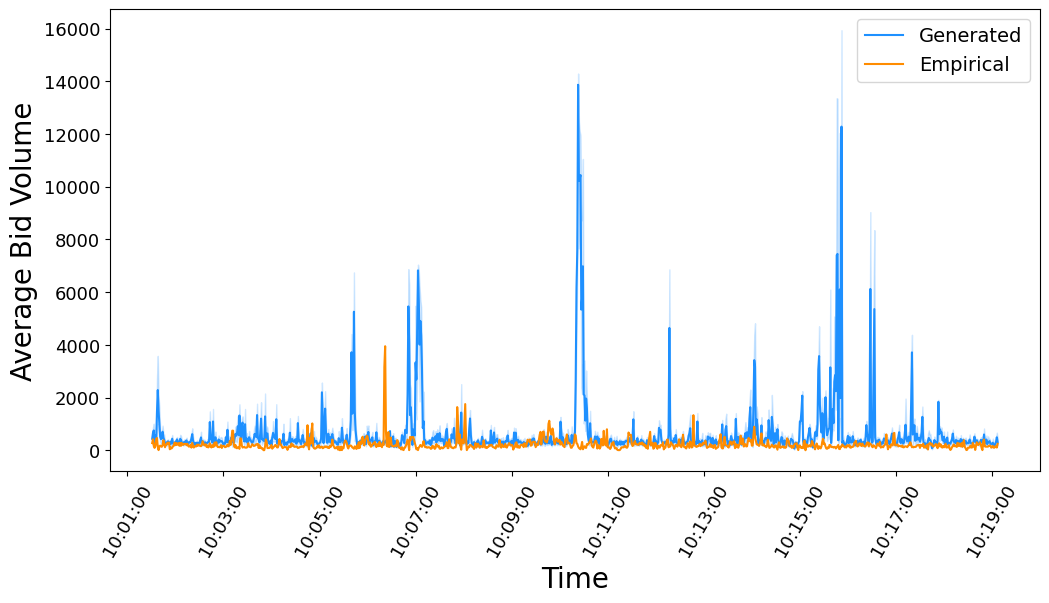

In [ ]:

# fill a dataframe with the bucketed volumes
bucketed_vol_gen_df = pd.DataFrame({
    'time': np.repeat(adj_time_intervals_gen[:-1], len(dates)),
    'bid_vol': bucketed_bid_vol_gen_list, # average bid volume
    'ask_vol': bucketed_ask_vol_gen_list, # average ask volume
    'type': np.repeat('Generated', len(bucketed_bid_vol_gen_list))
})

bucketed_vol_real_df = pd.DataFrame({
    'time': adj_time_intervals_gen[:-1],
    'bid_vol': bucketed_bid_vol_real, # average bid volume
    'ask_vol': bucketed_ask_vol_real, # average ask volume
    'type': np.repeat('Empirical', len(bucketed_bid_vol_real))
})

# merge the dataframes
bucketed_bid_vol_df = pd.concat([bucketed_vol_gen_df, bucketed_vol_real_df], axis=0)

# plot the average bid volume over time using sns.lineplot
plt.figure(figsize=(12, 6))
colors = ['dodgerblue', 'darkorange']
sns.lineplot(x='time', y='bid_vol', data=bucketed_bid_vol_df, hue='type', palette=colors)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Average Bid Volume", fontsize=20)
plt.legend(fontsize=14)

time_mesh = np.arange(
    str_to_ns("10:01:00"),
    str_to_ns(fmt_ts(min_last_time_gen).split(" ")[1]), 
    1e9*60*2 # last number is minutes increment (every 2 minutes in this case)
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

plt.tick_params(axis='both', labelsize=13)

# save the plot
if save_gpt_fig:
    plt.savefig(f'{fig_path}/bid_volume_1st_level_12302019_AAPL.pdf', bbox_inches='tight')

# plt.savefig(f'{fig_path}/bid_volume_1st_level_12302019_AAPL_edit.pdf', bbox_inches='tight')

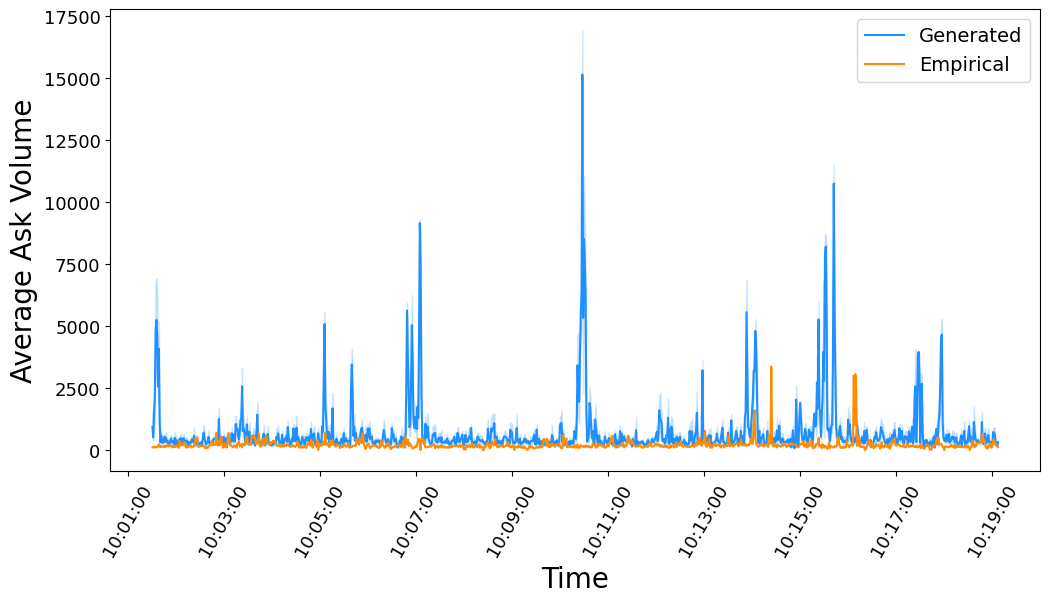

In [ ]:
# plot the average ask volume over time using sns.lineplot
plt.figure(figsize=(12, 6))
colors = ['dodgerblue', 'darkorange']
sns.lineplot(x='time', y='ask_vol', data=bucketed_bid_vol_df, hue='type', palette=colors)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Average Ask Volume", fontsize=20)
plt.legend(fontsize=14)

time_mesh = np.arange(
    str_to_ns("10:01:00"),
    str_to_ns(fmt_ts(min_last_time_gen).split(" ")[1]), 
    1e9*60*2 # last number is minutes increment (every 2 minutes in this case)
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

plt.tick_params(axis='both', labelsize=13)

# save the plot
if save_gpt_fig:
    plt.savefig(f'{fig_path}/ask_volume_1st_level_12302019_AAPL.pdf', bbox_inches='tight')

# plt.savefig(f'{fig_path}/ask_volume_1st_level_12302019_AAPL_edit.pdf', bbox_inches='tight')

In [44]:
bucket_spread_gen_list = []
bucket_spread_real = []

for sim_date in dates:
    L1_gen = L1_gen_dict[sim_date]
    times = [L1_gen[i][0] for i in range(len(L1_gen))]
    L1_gen_bid = [L1_gen[i][1][0] for i in range(len(L1_gen))]
    L1_gen_ask = [L1_gen[i][2][0] for i in range(len(L1_gen))]
    # convert to dollars
    L1_gen_bid = [(bid / 100) for bid in L1_gen_bid]
    L1_gen_ask = [(ask / 100) for ask in L1_gen_ask]
    L1_gen_spread = [ask - bid for bid, ask in zip(L1_gen_bid, L1_gen_ask)]
    L1_gen_spread_df = pd.DataFrame({
        'time': times,
        'spread': L1_gen_spread
    })

    # bucket the average bid and ask volumes for each second
    bucketed_spread_gen = []

    # bucket the generated data
    for i in range(len(adj_time_intervals_gen) - 1):
        start_time = adj_time_intervals_gen[i]
        end_time = adj_time_intervals_gen[i+1]

        # filter the speads that fall within the current time interval
        spread_in_interval_gen = L1_gen_spread_df[(L1_gen_spread_df['time'] >= start_time) & (L1_gen_spread_df['time'] < end_time)]['spread']

        # compute the average spread over the interval
        if len(spread_in_interval_gen) > 0:
            avg_spread = np.mean(spread_in_interval_gen)
            bucketed_spread_gen.append(avg_spread)
        else:
            # make this nan and then ffill later?
            print("No data in interval")
            continue
    
    bucket_spread_gen_list += bucketed_spread_gen

# bucket the real data
bucketed_spread_real = []
L1_real_spread = real_book_df_seq['1_ask_price'].values - real_book_df_seq['1_bid_price'].values
L1_real_spread_df = pd.DataFrame({
    'time': real_book_df_seq['time'].values,
    'spread': L1_real_spread
})
for i in range(len(adj_time_intervals_gen) - 1):
    start_time = adj_time_intervals_gen[i]
    end_time = adj_time_intervals_gen[i+1]

    # filter the bid and ask volumes that fall within the current time interval
    spread_in_interval_real = L1_real_spread_df[(L1_real_spread_df['time'] >= start_time) & (L1_real_spread_df['time'] < end_time)]['spread']

    # compute the average bid and ask volumes over the interval
    if len(spread_in_interval_real) > 0:
        avg_spread = np.mean(spread_in_interval_real)
        bucketed_spread_real.append(avg_spread)
    else:
        # make this nan and then ffill later?
        print("No data in interval")
        continue

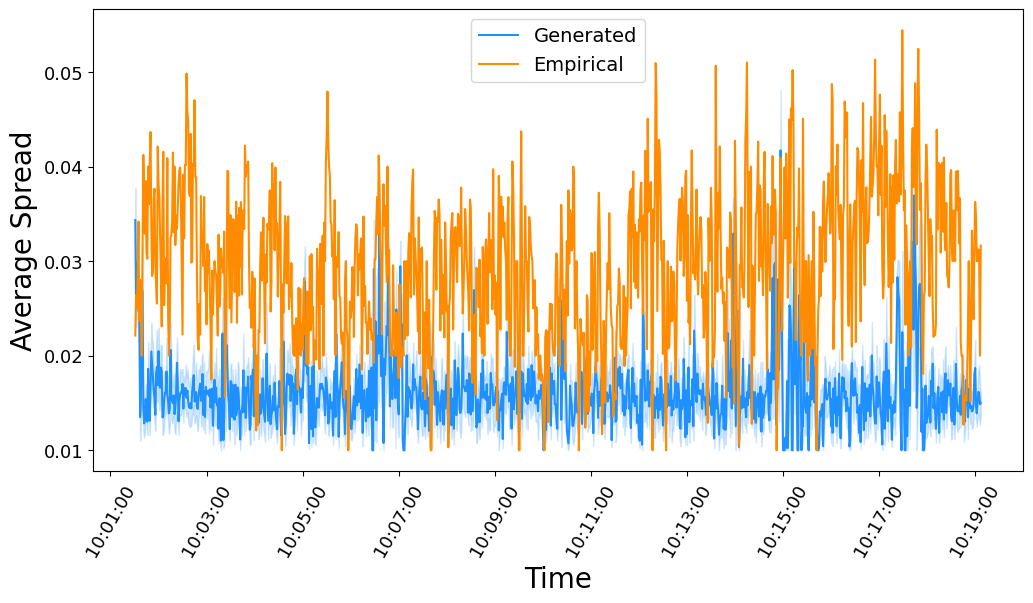

In [ ]:
# fill a dataframe with the bucketed spread
bucketed_spread_gen_df = pd.DataFrame({
    'time': np.repeat(adj_time_intervals_gen[:-1], len(dates)),
    'spread': bucket_spread_gen_list, # average spread
    'type': np.repeat('Generated', len(bucket_spread_gen_list))
})

bucketed_spread_real_df = pd.DataFrame({
    'time': adj_time_intervals_gen[:-1],
    'spread': bucketed_spread_real, # average spread
    'type': np.repeat('Empirical', len(bucketed_spread_real))
})

# merge the dataframes
bucketed_spread_df = pd.concat([bucketed_spread_gen_df, bucketed_spread_real_df], axis=0)

# plot the average spread over time using sns.lineplot
plt.figure(figsize=(12, 6))
# colors = ['dodgerblue', 'darkorange']
sns.lineplot(x='time', y='spread', data=bucketed_spread_df, hue='type', palette=colors)
# sns.lineplot(x='time', y='spread', data=bucketed_spread_gen_df, hue='type')
plt.xlabel("Time", fontsize=20)
plt.ylabel("Average Spread", fontsize=20)
plt.legend(fontsize=14)

time_mesh = np.arange(
    str_to_ns("10:01:00"),
    str_to_ns(fmt_ts(min_last_time_gen).split(" ")[1]), 
    1e9*60*2 # last number is minutes increment (every 2 minutes in this case)
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

plt.tick_params(axis='both', labelsize=13)

# save the plot
if save_gpt_fig:
    plt.savefig(f'{fig_path}/spread_12302019_AAPL.pdf', bbox_inches='tight')

# plt.savefig(f'{fig_path}/spread_12302019_AAPL_edit.pdf', bbox_inches='tight')

In [73]:
bucketed_returns_gen_list = []
bucketed_returns_real_list = []

for sim_date in dates:
    L1_gen = L1_gen_dict[sim_date]
    times = [L1_gen[i][0] for i in range(len(L1_gen))]
    bids = [L1_gen[i][1][0] for i in range(len(L1_gen))]
    asks = [L1_gen[i][2][0] for i in range(len(L1_gen))]
    # convert to dollars
    bids = [(bid / 100) for bid in bids]
    asks = [(ask / 100) for ask in asks]
    mid_price = [(bid + ask) / 2 for bid, ask in zip(bids, asks)]
    L1_gen_prices_df = pd.DataFrame({
        'time': times,
        'mid_price': mid_price
    })[:size_gen_seq]

    # bucket the returns for each second
    bucketed_returns_gen = []

    # bucket the generated data
    # for i in range(len(adj_time_intervals_gen) - 1):
    #     start_time = adj_time_intervals_gen[i]
    #     end_time = adj_time_intervals_gen[i+1]
    for i in range(len(market_time_intervals_real) - 1):
        start_time = market_time_intervals_real[i]
        end_time = market_time_intervals_real[i+1]

        # filter the returns that fall within the current time interval
        prices_in_interval_gen = L1_gen_prices_df[(L1_gen_prices_df['time'] >= start_time) & (L1_gen_prices_df['time'] < end_time)]['mid_price']

        # compute the return over the interval
        if len(prices_in_interval_gen) > 0:
            r = np.log(prices_in_interval_gen.iloc[-1]) - np.log(prices_in_interval_gen.iloc[0])
            bucketed_returns_gen.append(r)
        else:
            # make this nan and then ffill later?
            # print("No data in interval")
            continue
    
    bucketed_returns_gen_list.append(bucketed_returns_gen)
    
    # bucketed_returns_gen_list += bucketed

Mean kurtosis of generated returns: 4.9324595717836175
Std kurtosis of generated returns: 1.987562469719985
Kurtosis of real returns: 2.4355722396159516


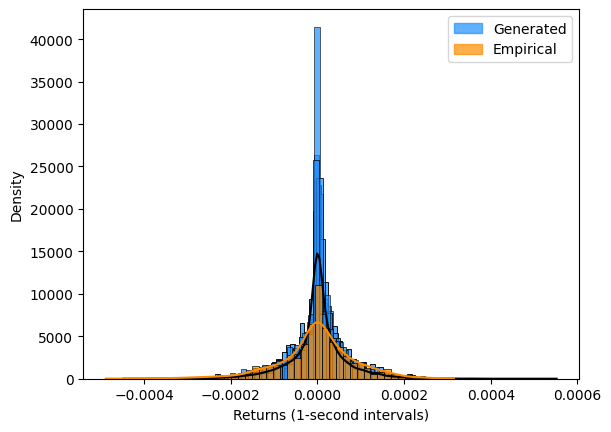

In [74]:
n_bins = 50
kurtosis_gen_list = []
for bucket_r_gen in bucketed_returns_gen_list:
    # plt.hist(bucket_r_gen, color='dodgerblue', density=True, bins=n_bins, alpha=0.7)
    sns.histplot(bucket_r_gen, bins=n_bins, stat='density', color='dodgerblue', alpha=0.7)
    kurtosis_gen_list.append(stats.kurtosis(bucket_r_gen))
print("Mean kurtosis of generated returns:", np.mean(kurtosis_gen_list))
print("Std kurtosis of generated returns:", np.std(kurtosis_gen_list))

# flatten bucketed_returns_gen_list and plot kde
bucketed_returns_gen_flat = [item for sublist in bucketed_returns_gen_list for item in sublist]
sns.kdeplot(bucketed_returns_gen_flat, color='black', label='Generated')

# plt.hist(bucketed_returns_real, color='darkorange', density=True, bins=n_bins, alpha=0.7)
sns.histplot(bucketed_returns_real, bins=n_bins, kde=True, stat='density', color='darkorange', alpha=0.7)
print("Kurtosis of real returns:", stats.kurtosis(bucketed_returns_real))

from matplotlib.patches import Rectangle
plt.legend(handles=[Rectangle((0,0),1,1,color='dodgerblue', alpha=0.7),
                    Rectangle((0,0),1,1,color='darkorange', alpha=0.7)],
                    labels=['Generated', 'Empirical'])
# set axis labels
plt.xlabel("Returns (1-second intervals)")
plt.ylabel("Density")
# ax.set_xlabel('Returns (1-second intervals)')
# ax.set_ylabel('Density') # normalize such that the total area of the histogram equals 1

# save the plot
if save_gpt_fig:
    plt.savefig(f'{fig_path}/heavy_tails_12302019_AAPL.pdf', bbox_inches='tight')

In [51]:
N = 200
returns_gen_list = []
returns_real_list = []
for i in range(N):
    # pick a random 100 messages block from the generated data
    random_index = random.randint(0, len(gen_data_df) - 100)
    # print("random_index:", random_index)
    # random_100_gen = gen_data_df.iloc[random_index:random_index+100]
    # random_indices = random.sample(range(len(gen_data_df)), 100)
    # random_100_gen = gen_data_df.iloc[random_indices]

    # pick a random 100 messages block from the real data
    random_index = random.randint(0, len(real_msg_df_seq) - 100)
    # print("random_index:", random_index)
    # random_100_real = real_msg_df_seq.iloc[random_index:random_index+100]
    random_100_real = real_book_df_seq.iloc[random_index:random_index+100]
    # random_indices = random.sample(range(len(real_msg_df_seq)), 100)
    # random_100_real = real_msg_df_seq.iloc[random_indices]

    # plot the return between the first mid-price and the mid-price at the time of the message for each of the 100 messages
    returns_gen = []
    returns_real = []
    init_price_gen = (asks[random_index] + bids[random_index]) / 2
    init_price_real = (random_100_real['1_ask_price'].values[0] + random_100_real['1_bid_price'].values[0]) / 2
    for i in range(100):
        # gen_mid_price = [(ask + bid) / 2 for ask, bid in zip(asks[random_index:random_index+100], bids[random_index:random_index+100])]
        gen_mid_price = (asks[random_index+i] + bids[random_index+i]) / 2
        real_mid_price = (random_100_real['1_ask_price'].values[i] + random_100_real['1_bid_price'].values[i]) / 2
        # returns_gen.append(np.log(gen_mid_price) - np.log(gen_mid_price[0]))
        returns_gen.append(np.log(gen_mid_price) - np.log(init_price_gen))
        returns_real.append(np.log(real_mid_price) - np.log(init_price_real))
    returns_gen_list.append(returns_gen)
    returns_real_list.append(returns_real)

# plt.plot(returns_gen, lw=1, color='dodgerblue', alpha=0.7)
# plt.plot(returns_real, lw=1, color='darkorange', alpha=0.7)
# plt.xlabel("Future Messages")
# plt.ylabel("Returns")
# plt.legend(['Generated', 'Empirical'], fontsize=12)



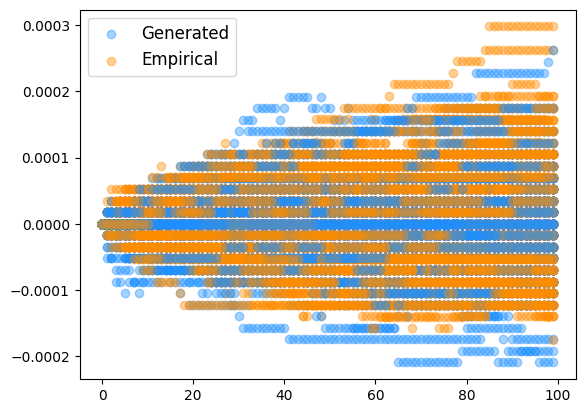

In [52]:
# plot the distribution of returns

returns_gen_list #= np.array(returns_gen_list).flatten()
fut_messages = [i for i in range(100)]


for i in range(len(returns_real_list)):
    # plt.plot(returns_gen_list[i], lw=1, color='dodgerblue', alpha=0.7)
    plt.scatter(fut_messages, returns_gen_list[i], lw=1, color='dodgerblue', alpha=0.4)
    plt.scatter(fut_messages, returns_real_list[i], lw=1, color='darkorange', alpha=0.4)

plt.legend(['Generated', 'Empirical'], fontsize=12)

# plt.hist(returns_gen_list, color='dodgerblue', bins=500, alpha=0.7)

In [53]:
returns_gen_arr = np.array(returns_gen_list)
returns_real_arr = np.array(returns_real_list)

returns_gen_arr.shape

(200, 100)

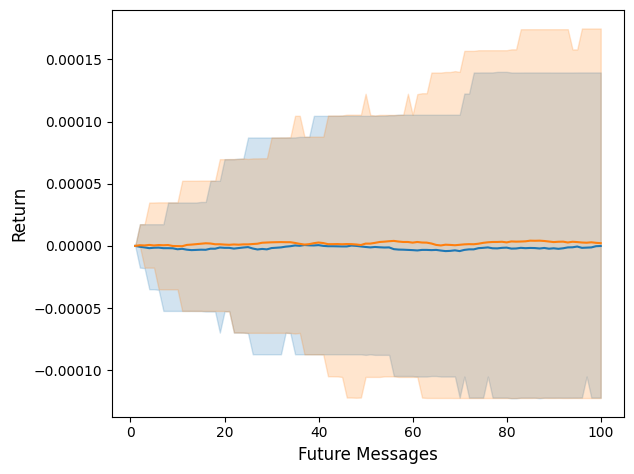

In [54]:
df_gen = pd.DataFrame(returns_gen_arr).melt()
df_gen['type'] = 'Generated'
df_real = pd.DataFrame(returns_real_arr).melt()
df_real['type'] = 'Empirical'
df = pd.concat([df_gen, df_real]).reset_index(drop=True)
df.columns = ['time', 'returns', 'type']
# start counting at 1
df.time += 1

fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x='time', y='returns', hue='type', data=df, errorbar=('pi', 95))

plt.tight_layout()

plt.xlabel("Future Messages", fontsize=12)
plt.ylabel("Return", fontsize=12)

# remove legend
plt.gca().get_legend().remove()

# save the plot
if save_figs:
    plt.savefig(f'{sim_data_path}{sim_date}/figs/returns_vs_future_messages.pdf', bbox_inches='tight')